In [1]:
# Instalación de Complementos
!pip install pandas openpyxl
!pip install wordcloud
!pip install sweetviz
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
import re
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv


In [3]:
# Se carga la base de datos creada anteriormente
file_path = 'BD_ActualizadoF.csv'

# Lee el archivo CSV especificando el códec
BD_fallas = pd.read_csv(file_path, encoding='latin1')

# Muestra las primeras filas del DataFrame
BD_fallas.head()

ConsecutivoOP  ConsecPedido    Cliente   Producto  \
0          65433         26765  860009808  30351506C   
1          54312         23311  890100251    1018018   
2          66729         27177  860009808   30179097   
3          67135         27380  860009808  30321162D   
4          67133         27380  860009808  30321162B   

                NombProducto          OCCliente Actividad  \
0        PTNA INT 16X103X301         4530313020     CORT2   
1    CDNA FB 864-K443-C2-P7"         4500529054      ENSA   
2   CDNA FB-6830-K2-C2 P 6"          4500556454      EMPA   
3  PTNA INT ADIT 9.5X152X349  E-MAIL 02/11/2021      ENDE   
4        PTNA CAB 9.5X78X349  E-MAIL 02/11/2021     CORT2   

                                      RecMAQ              RecHOM  SecAct  ...  \
0                          OXICORTE Y PLASMA              CORTAR       1  ...   
1                            PRENSA ANCLAJES             FORJADO       1  ...   
2                  BANCO DE TRABAJO DESPACHO  PRODUCTO TERMINADO       7  ...   
3  PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS             FORJADO       4  ...   
4                          OXICORTE Y PLASMA              CORTAR       1  ...   

  Medida sin desgaste en mm2 (RODILLO) Medida actual en mm2 (RODILLO)  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   

  Porcentaje de desgaste actual % (RODILLO) Altura de la platina en mm  \
0                                       NaN                      102.0   
1                                       NaN                        NaN   
2                                       NaN                        NaN   
3                                       NaN                      350.0   
4                                       NaN                      350.0   

  Medida actual de la platina en mm (PLATINA)  \
0                                       101.0   
1                                         NaN   
2                                         NaN   
3                                       349.0   
4                                       349.0   

  Porcentaje de desgaste actual % (PLATINA) Paso en mm Cantidad de pasos  \
0                                     0.980      177.8               6.0   
1                                       NaN        NaN               NaN   
2                                       NaN        NaN               NaN   
3                                     0.286      250.0               6.0   
4                                     0.286      250.0               6.0   

        Falla  Valor  
0    Desgaste  0.980  
1  Elongación  1.680  
2  Elongación  0.260  
3    Desgaste  0.286  
4    Desgaste  0.286  

[5 rows x 47 columns]

In [4]:
# se verifica tamaño
BD_fallas.shape

(47, 47)

In [5]:
# Verificación de nulos
print("\nNúmero de datos faltantes por columna:")
print(BD_fallas.isnull().sum())


Número de datos faltantes por columna:
ConsecutivoOP                                                   0
ConsecPedido                                                    0
Cliente                                                         0
Producto                                                        0
NombProducto                                                    0
OCCliente                                                       0
Actividad                                                       0
RecMAQ                                                          0
RecHOM                                                          0
SecAct                                                          0
FechEstInicil                                                   0
estado                                                          0
TipoConsecutivo                                                 0
Fecha de visita                                                 0
Empresa                             

Es de entender que los nulos que aparecen no hacen referencia  a una ausencia de datos, sino a la naturaleza de datos, debido a que en la sección de elogación no aplica las mismas variables para todos, se debe tratar esa organización en la etapa del modelo

In [6]:
# Se verifica tipo de variable
BD_fallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 47 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ConsecutivoOP                                                47 non-null     int64  
 1   ConsecPedido                                                 47 non-null     int64  
 2   Cliente                                                      47 non-null     object 
 3   Producto                                                     47 non-null     object 
 4   NombProducto                                                 47 non-null     object 
 5   OCCliente                                                    47 non-null     object 
 6   Actividad                                                    47 non-null     object 
 7   RecMAQ                                                       47 non-null     objec

In [7]:
# Se verifica las columnas de la BD
BD_fallas.columns

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'PaÃ­s', 'Ciudad', 'Tipo de equipo', 'Pedido NÂ°', 'Material',
       'Causa de desgaste', 'Si escogiÃ³ otros, cuÃ¡l?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongaciÃ³n actual % (CADENA)',
       'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)',
       'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de desgast

In [8]:
# Correción de nombres de columnas

# Crear un diccionario para corregir los nombres de las columnas
correcciones = {
    'PaÃ­s': 'País',
    'Si escogiÃ³ otros, cuÃ¡l?': 'Si escogió otros, ¿cuál?',
    'Escoja el desgaste donde se presenta': 'Escoja el desgaste donde se presenta',
    'Porcentaje de elongaciÃ³n actual % (CADENA)': 'Porcentaje de elongación actual % (CADENA)',
    'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)': 'Porcentaje de elongación máx % (CADENA)',
    'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)': 'Proyección en horas de operación restantes (H) (CADENA)',
    'Medida sin desgaste en mm (BUJE)': 'Medida sin desgaste en mm (BUJE)',
    'Medida actual en mm1 (BUJE)': 'Medida actual en mm1 (BUJE)',
    'Porcentaje de desgaste actual % (BUJE)': 'Porcentaje de desgaste actual % (BUJE)',
    'Medida sin desgaste en mm1 (PASADOR)': 'Medida sin desgaste en mm1 (PASADOR)',
    'Medida actual en mm (PASADOR)': 'Medida actual en mm (PASADOR)',
    'Porcentaje de desgaste actual % (PASADOR)': 'Porcentaje de desgaste actual % (PASADOR)',
    'Medida sin desgaste en mm2 (RODILLO)': 'Medida sin desgaste en mm2 (RODILLO)',
    'Medida actual en mm2 (RODILLO)': 'Medida actual en mm2 (RODILLO)',
    'Porcentaje de desgaste actual % (RODILLO)': 'Porcentaje de desgaste actual % (RODILLO)',
    'Altura de la platina en mm': 'Altura de la platina en mm',
    'Medida actual de la platina en mm (PLATINA)': 'Medida actual de la platina en mm (PLATINA)',
    'Porcentaje de desgaste actual % (PLATINA)': 'Porcentaje de desgaste actual % (PLATINA)',
    'Paso en mm': 'Paso en mm',
    'Cantidad de pasos': 'Cantidad de pasos'
}

# Aplicar las correcciones al DataFrame
BD_fallas.rename(columns=correcciones, inplace=True)

# Verificar que los nombres de las columnas se han actualizado
print(BD_fallas.columns)


Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'País', 'Ciudad', 'Tipo de equipo', 'Pedido NÂ°', 'Material',
       'Causa de desgaste', 'Si escogió otros, ¿cuál?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongación actual % (CADENA)',
       'Porcentaje de elongación máx % (CADENA)',
       'Proyección en horas de operación restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de desgaste actua

In [9]:
# correción de variables para elongación 

# Obtener los valores únicos en la columna 'Causa de desgaste'
valores_unicos = BD_fallas['Causa de desgaste'].unique()

# Mostrar los valores únicos
print(valores_unicos)


['ElongaciÃ³n prematura;DesalineaciÃ³n;Otros'
 'ElongaciÃ³n prematura;CavitaciÃ³n seca' 'DesalineaciÃ³n'
 'ElongaciÃ³n prematura;Otros' 'CavitaciÃ³n seca' 'Otros'
 'DesalineaciÃ³n;ElongaciÃ³n prematura;Otros;Falta de lubricaciÃ³n;Ruptura'
 'Velocidad incorrecta;DesalineaciÃ³n'
 'DesalineaciÃ³n;CavitaciÃ³n seca;Otros' nan
 'Medidas fuera de especificaciÃ³n' 'Ruptura' 'ElongaciÃ³n prematura'
 'Falta de lubricaciÃ³n']


In [10]:
# Corregir el nombre de los resultados de la variable 'Causa de desgaste'
# Definir un diccionario para corregir los errores de escritura
correcciones = {
    'ElongaciÃ³n prematura;DesalineaciÃ³n;Otros': 'Elongación prematura;Desalineación;Otros',
    'ElongaciÃ³n prematura;CavitaciÃ³n seca': 'Elongación prematura;Cavitación seca',
    'DesalineaciÃ³n': 'Desalineación',
    'ElongaciÃ³n prematura;Otros': 'Elongación prematura;Otros',
    'CavitaciÃ³n seca': 'Cavitación seca',
    'Otros': 'Otros',
    'DesalineaciÃ³n;ElongaciÃ³n prematura;Otros;Falta de lubricaciÃ³n;Ruptura': 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura',
    'Velocidad incorrecta;DesalineaciÃ³n': 'Velocidad incorrecta;Desalineación',
    'DesalineaciÃ³n;CavitaciÃ³n seca;Otros': 'Desalineación;Cavitación seca;Otros',
    'Medidas fuera de especificaciÃ³n': 'Medidas fuera de especificación',
    'Ruptura': 'Ruptura',
    'ElongaciÃ³n prematura': 'Elongación prematura',
    'Falta de lubricaciÃ³n': 'Falta de lubricación'
}

# Reemplazar las cadenas incorrectas en la columna 'Causa de desgaste'
BD_fallas['Causa de desgaste'] = BD_fallas['Causa de desgaste'].replace(correcciones)

# Verificar los resultados para asegurar que la corrección se realizó correctamente
print(BD_fallas['Causa de desgaste'].unique())


['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desalineación'
 'Elongación prematura;Otros' 'Cavitación seca' 'Otros'
 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura'
 'Velocidad incorrecta;Desalineación'
 'Desalineación;Cavitación seca;Otros' nan
 'Medidas fuera de especificación' 'Ruptura' 'Elongación prematura'
 'Falta de lubricación']


In [24]:
# correción de variables para material

# Obtener los valores únicos en la columna 'Material'
valores_unicos2 = BD_fallas['Material'].unique()

# Mostrar los valores únicos
print(valores_unicos)


['CLINKER' nan 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES' 'CAÃ\x91A'
 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÃ\x93N GRANULADO' 'HARINA CRUDA']


In [23]:
# Corregir los valores en la columna 'Material'
BD_fallas['Material'] = BD_fallas['Material'].replace({
    'CAÃ\x91A': 'CAÑA',
    'CARBÃ\x93N GRANULADO': 'CARBÓN GRANULADO',
    np.nan: 'DESCONOCIDO' 
})

# Mostrar los valores únicos después de la corrección
print(BD_fallas['Material'].unique())

['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES'
 'CAÑA' 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÓN GRANULADO'
 'HARINA CRUDA']


In [26]:
# correción de variables para pais

# Obtener los valores únicos en la columna 'Material'
valores_unicos3 = BD_fallas['País'].unique()

# Mostrar los valores únicos
print(valores_unicos3)


['COLOMBIA' 'MEXICO' 'PANAMÃ\x81']


In [27]:

# Corregir los valores en la columna 'País'
BD_fallas['País'] = BD_fallas['País'].replace({
    'PANAMÃ\x81': 'PANAMÁ'
})

# Mostrar los valores únicos después de la corrección
print(BD_fallas['País'].unique())


['COLOMBIA' 'MEXICO' 'PANAMÁ']


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprec


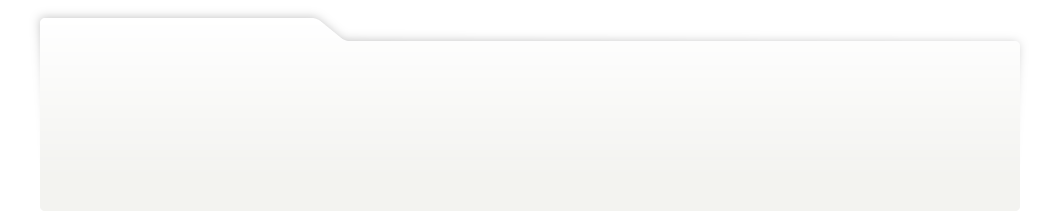
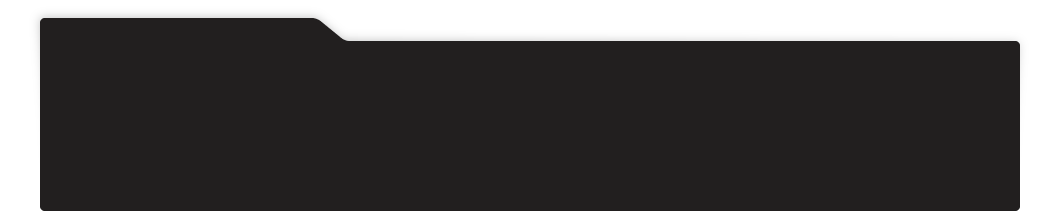
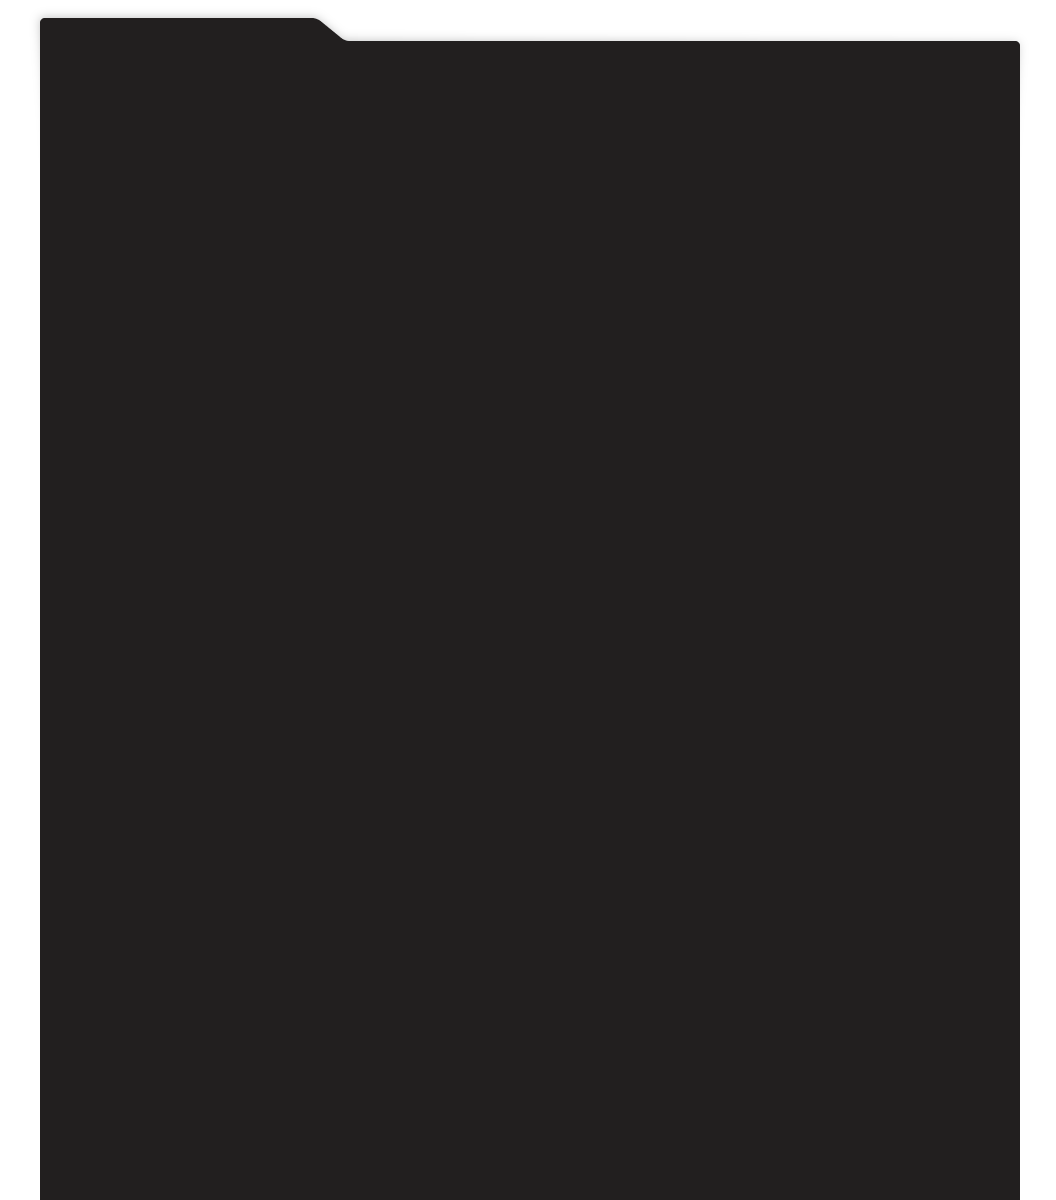
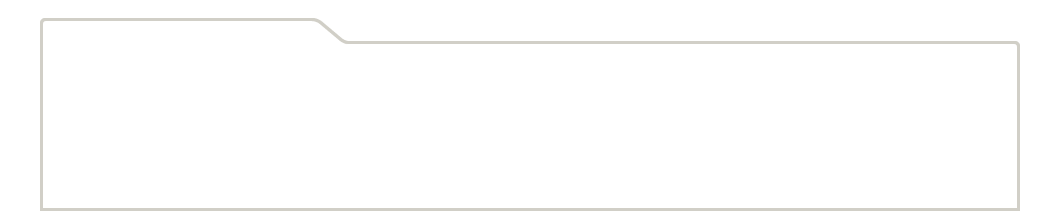
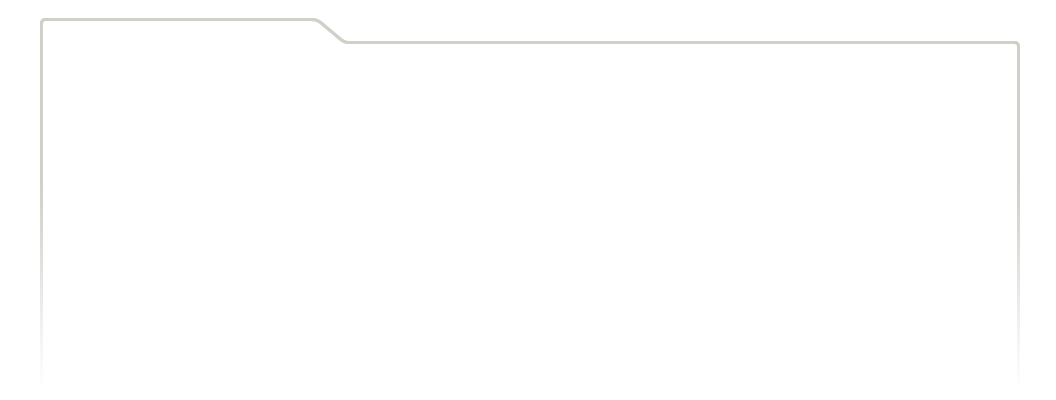
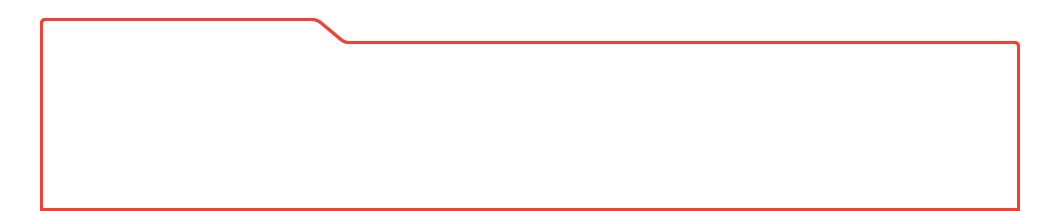
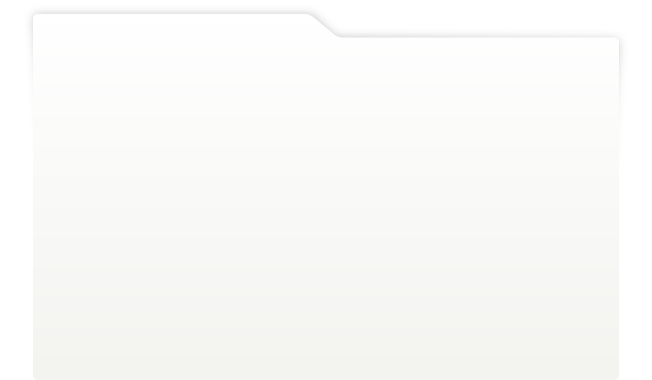
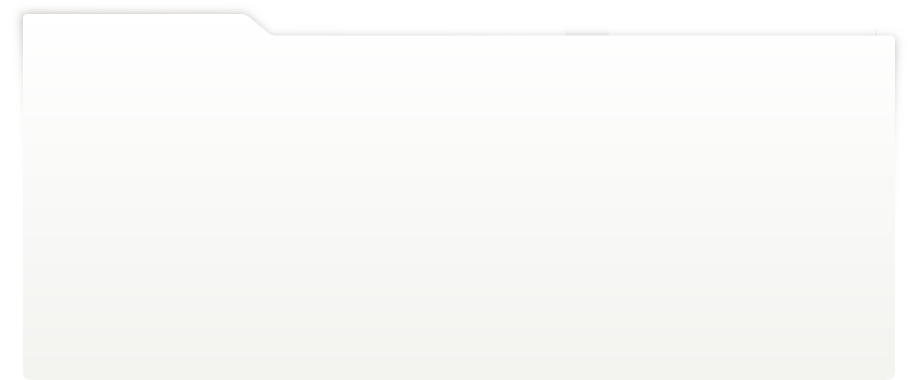
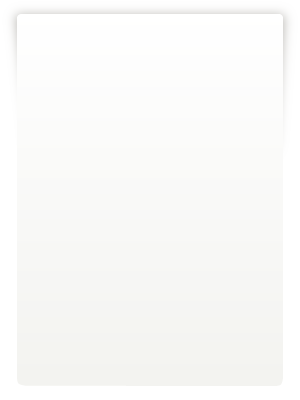
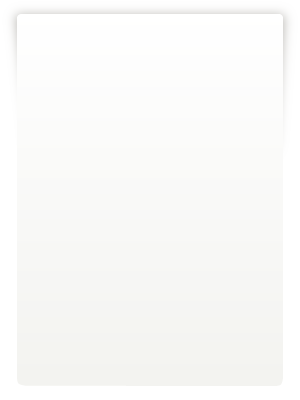
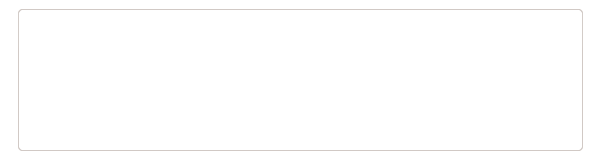
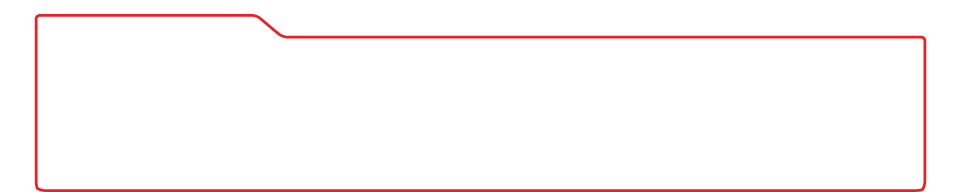
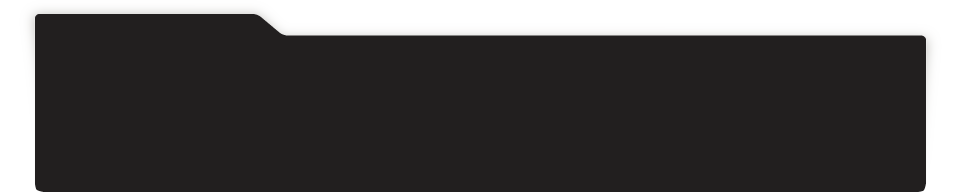
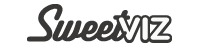
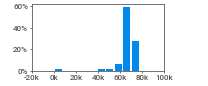
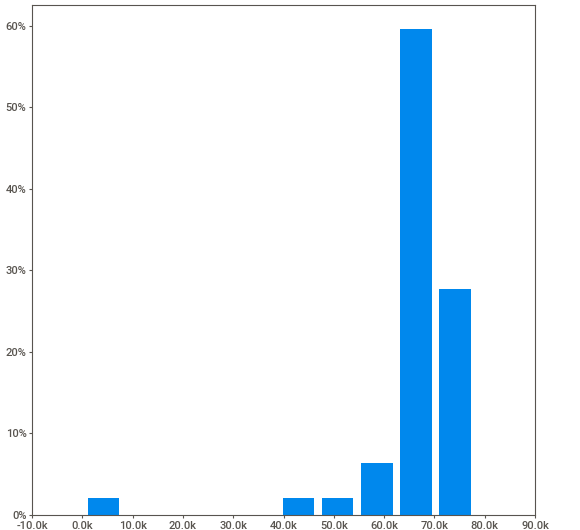
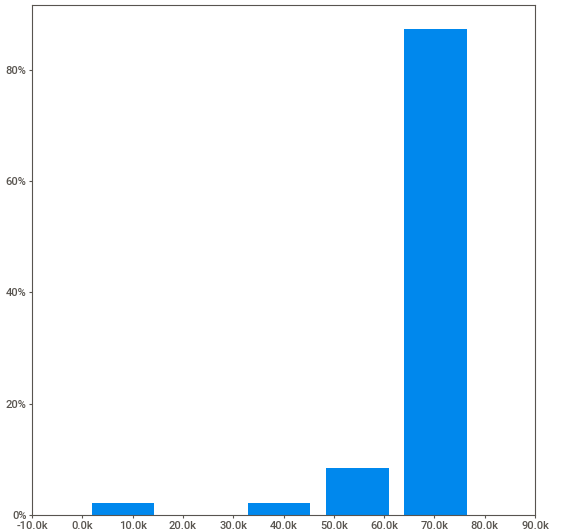
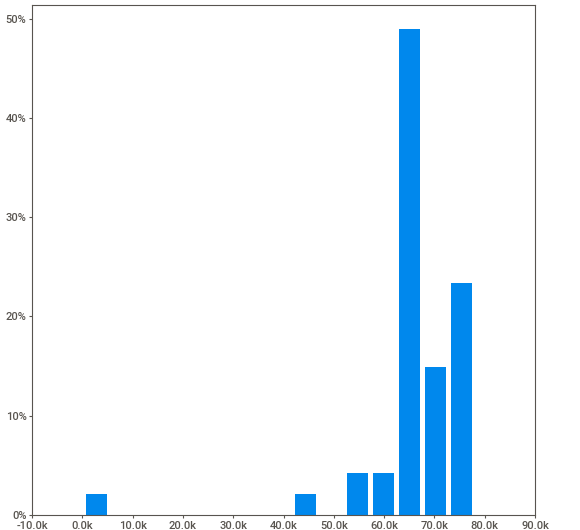
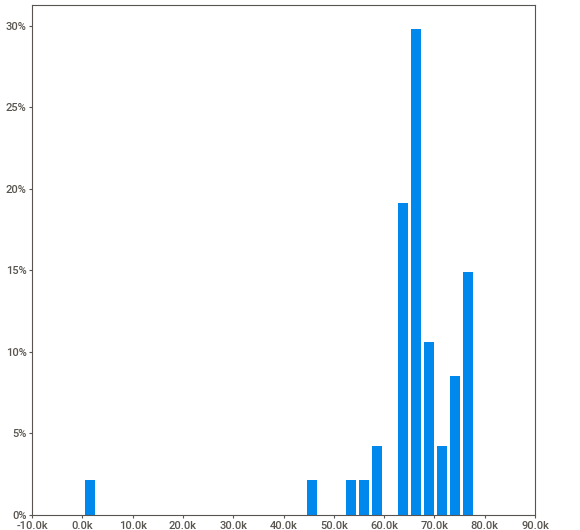
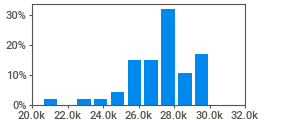
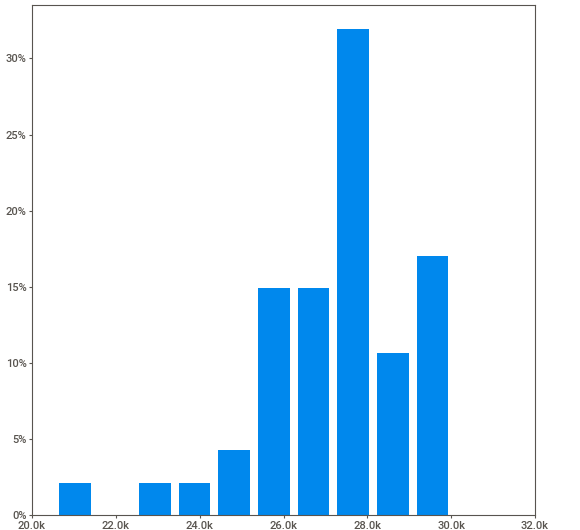
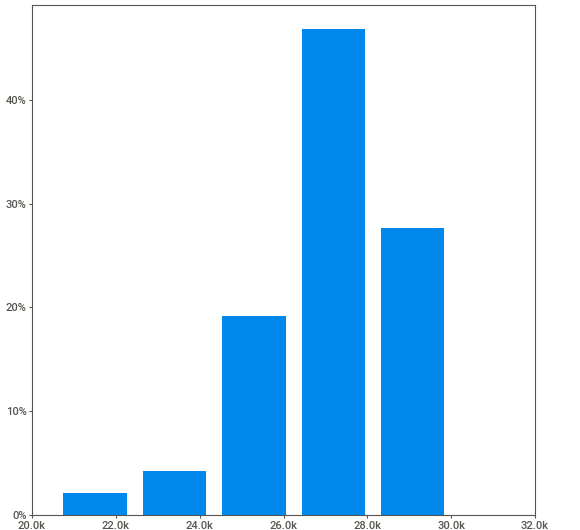
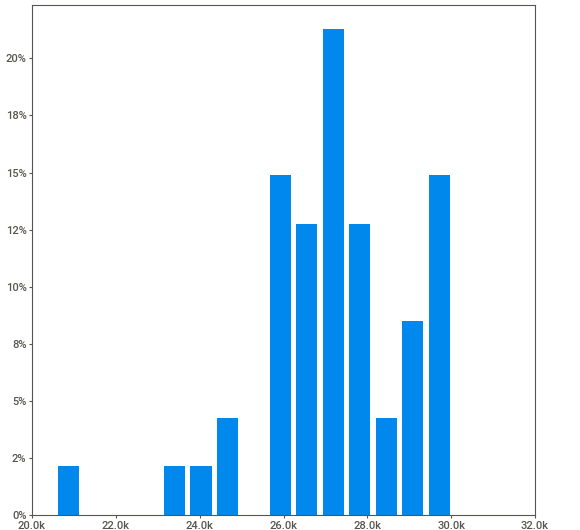
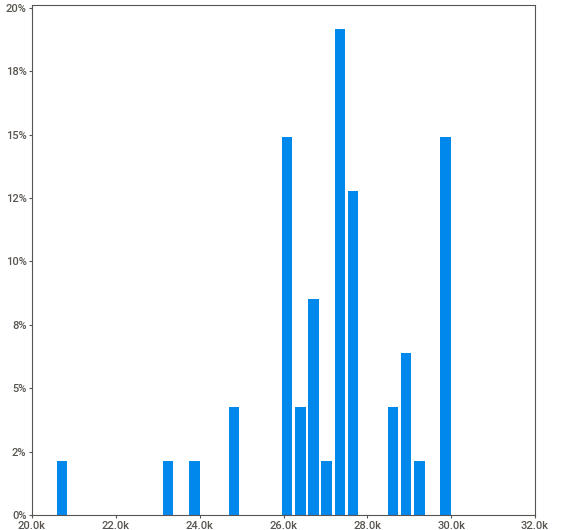
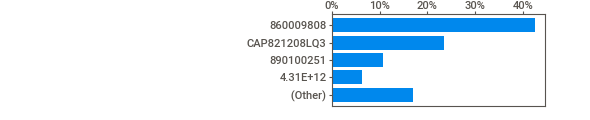
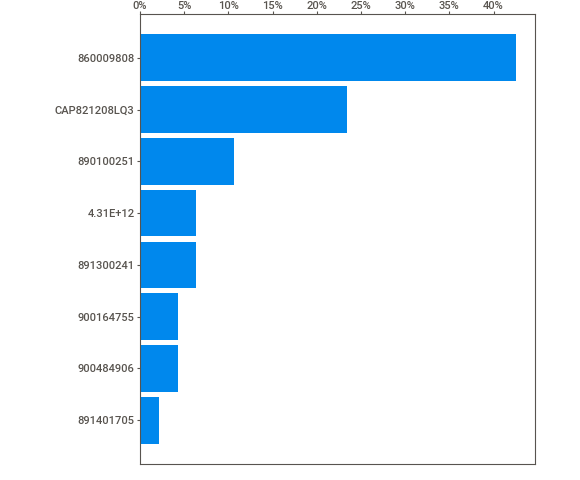
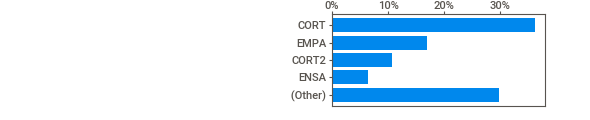
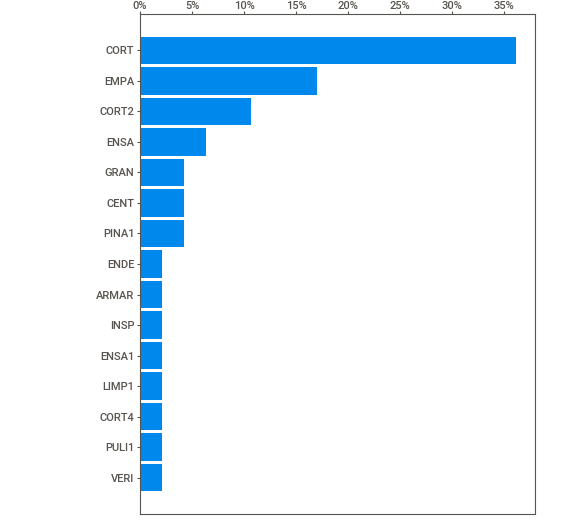
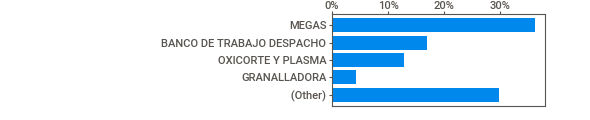
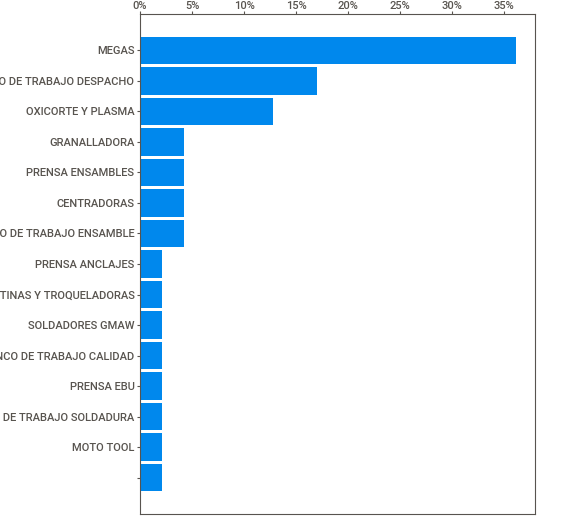
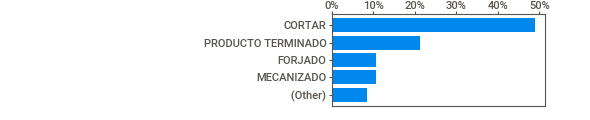
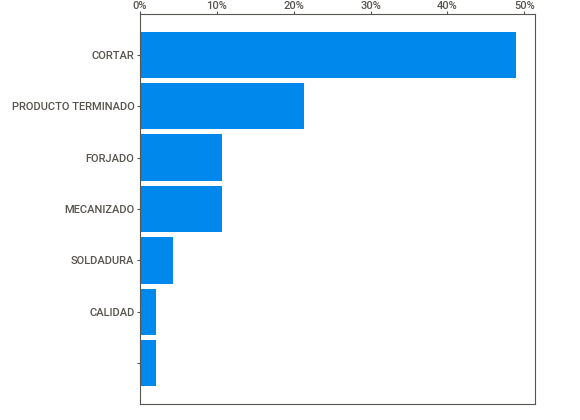
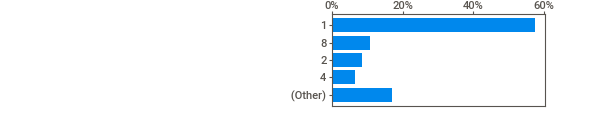
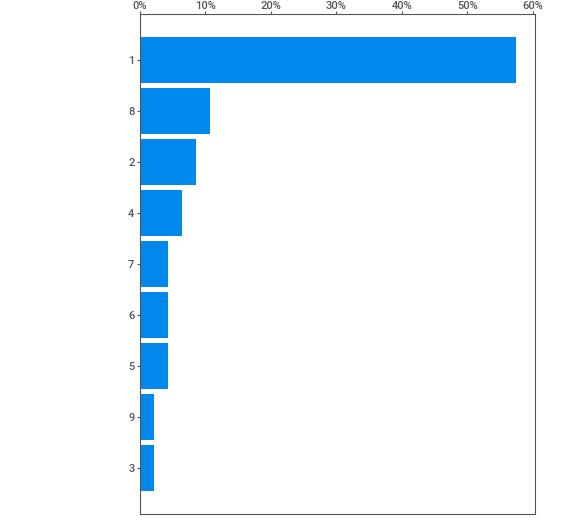
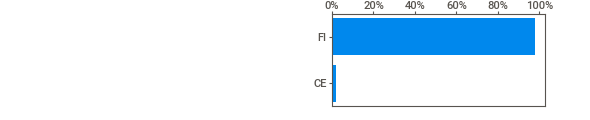
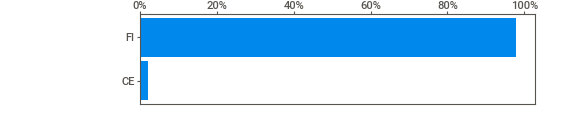
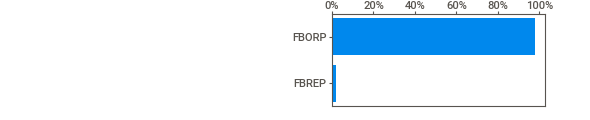
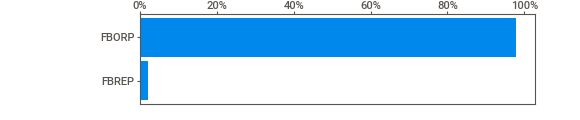
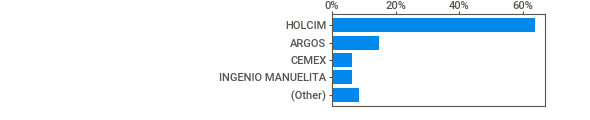
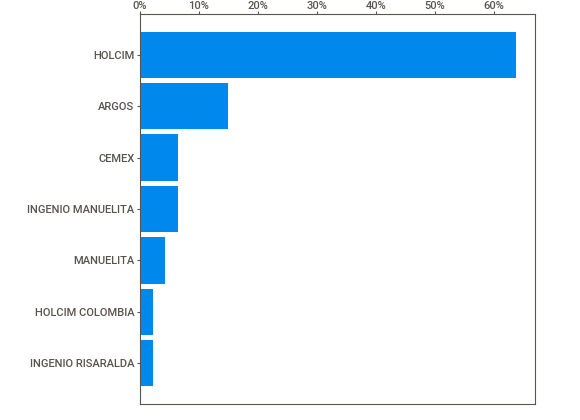
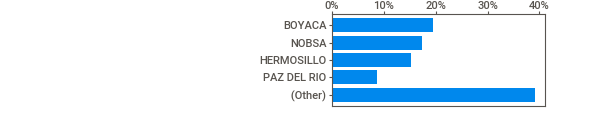
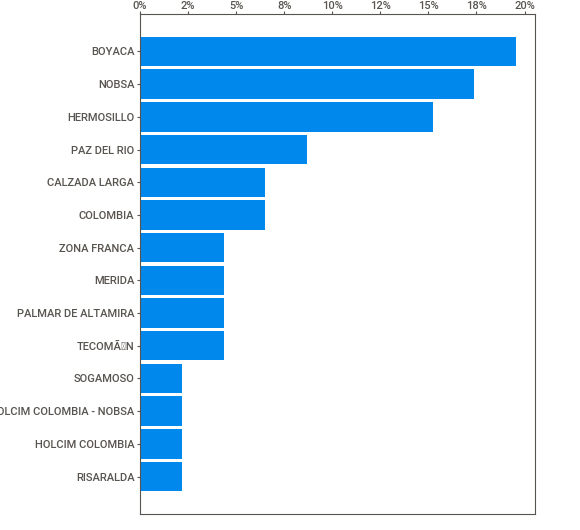
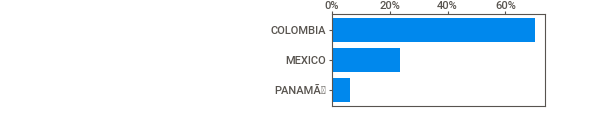
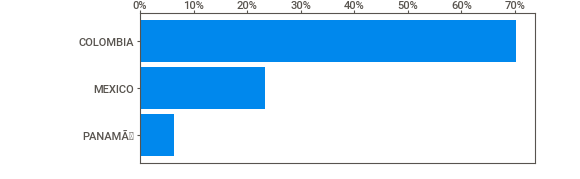
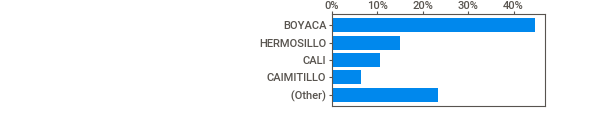
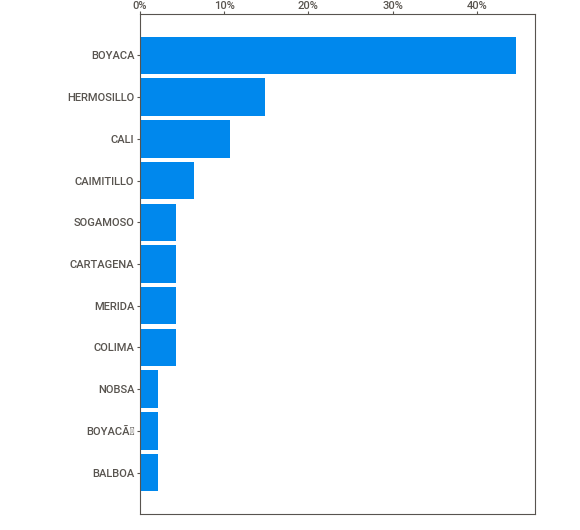
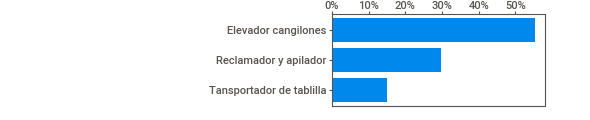
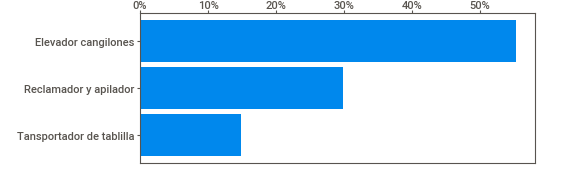
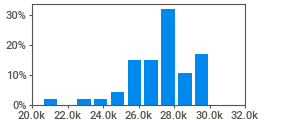
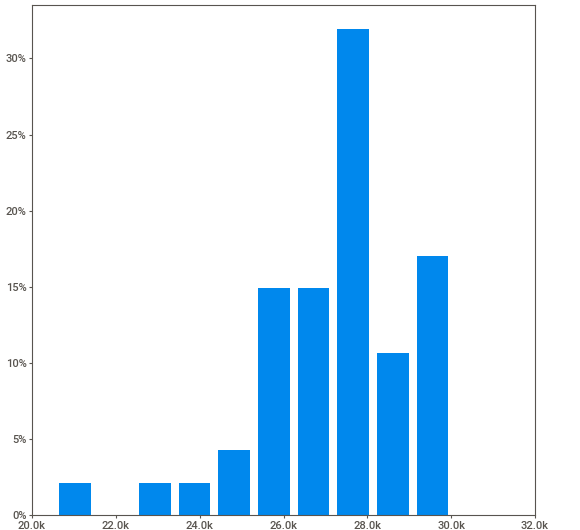
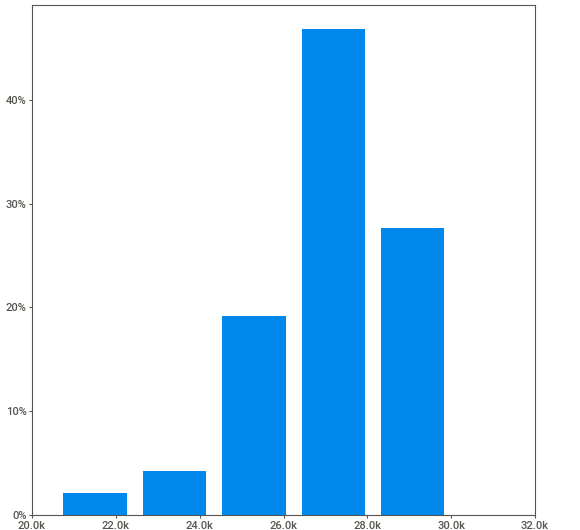
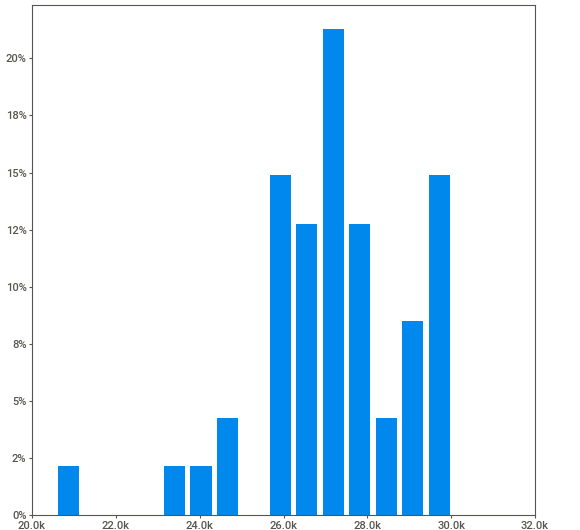
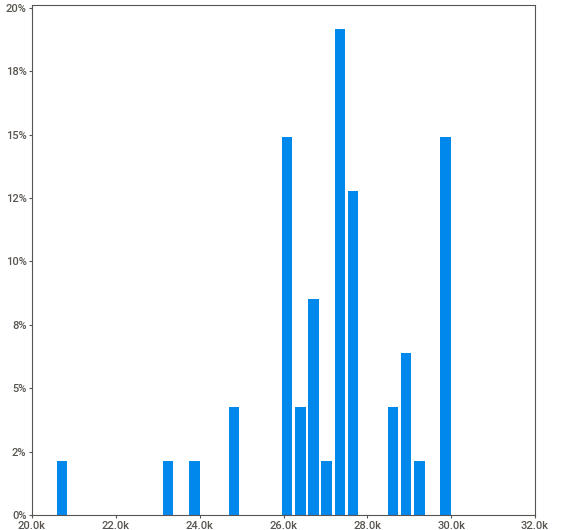
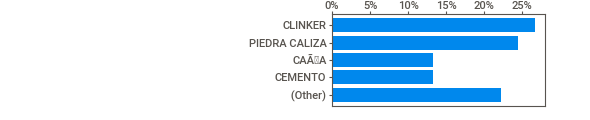
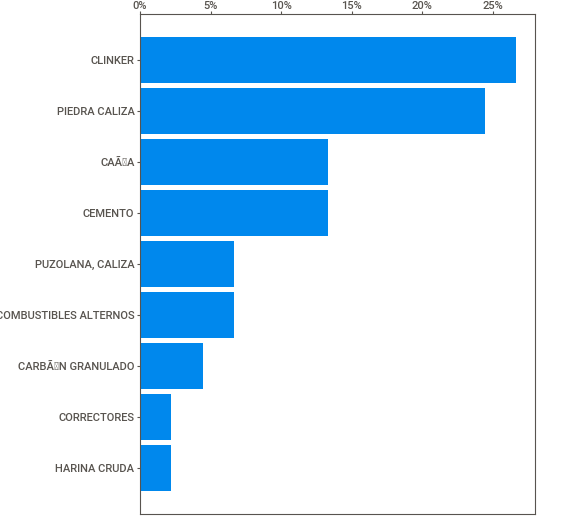
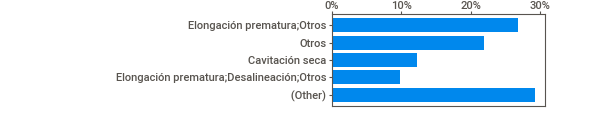
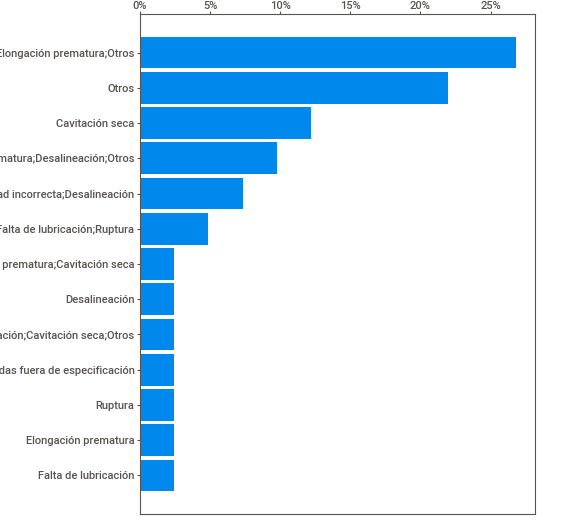
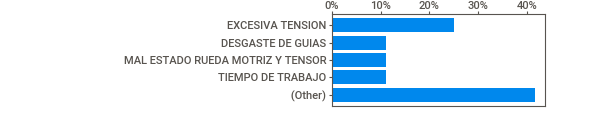
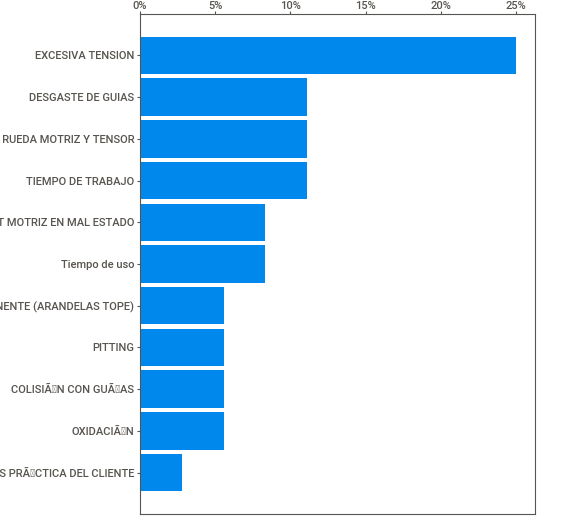
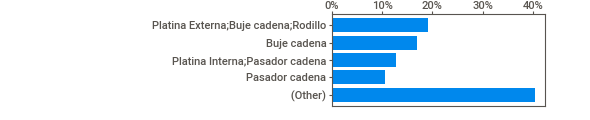
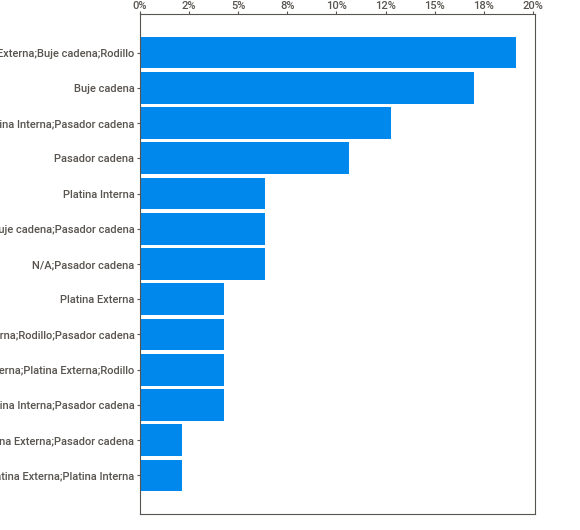
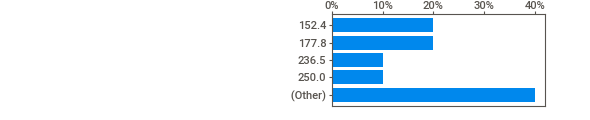
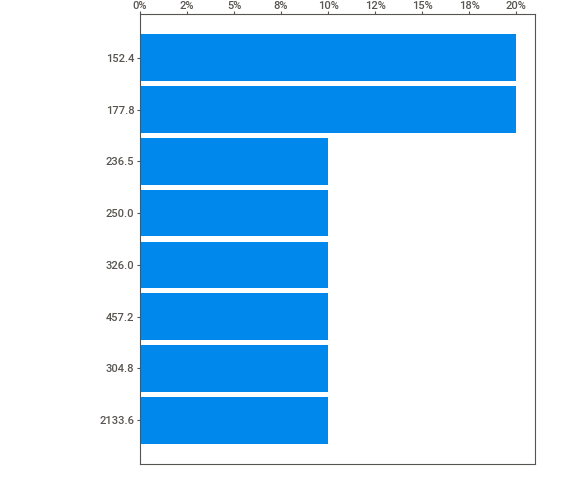
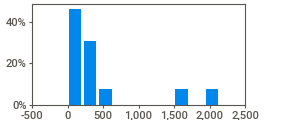
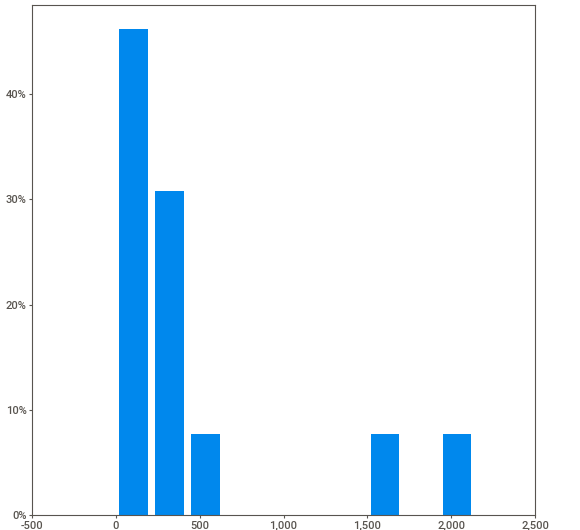
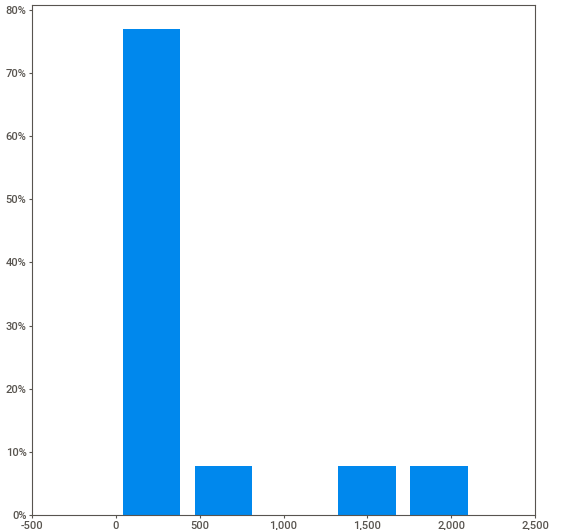
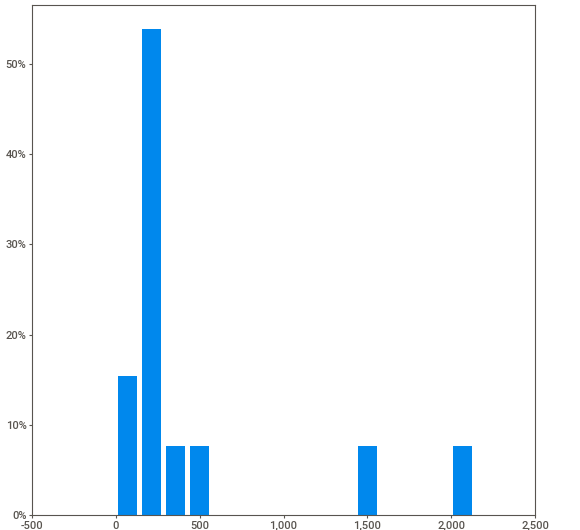
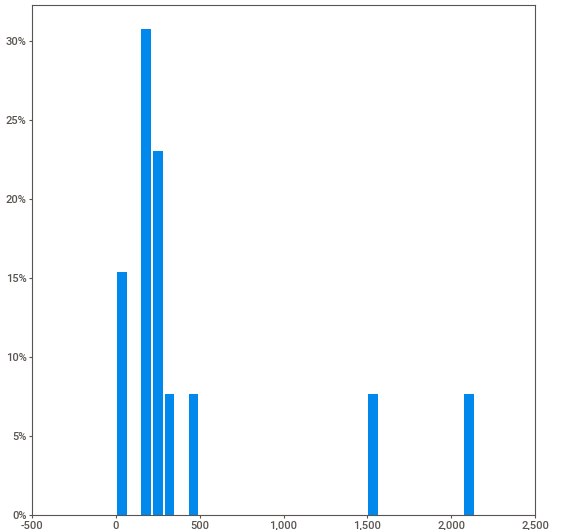
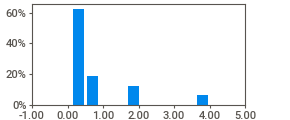
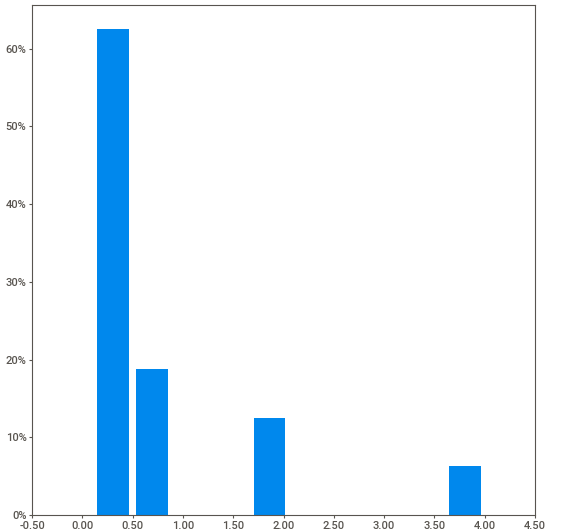
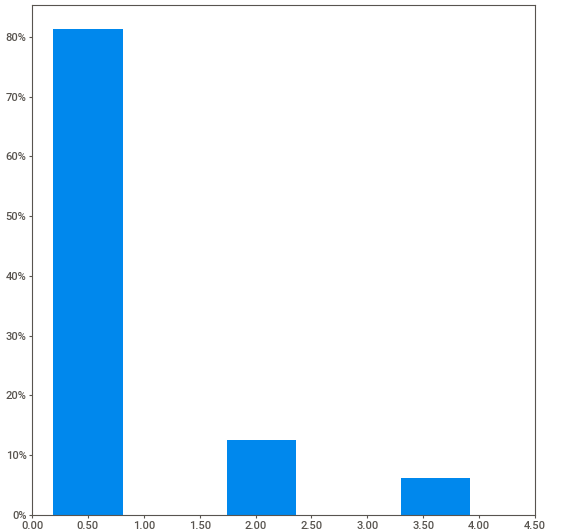
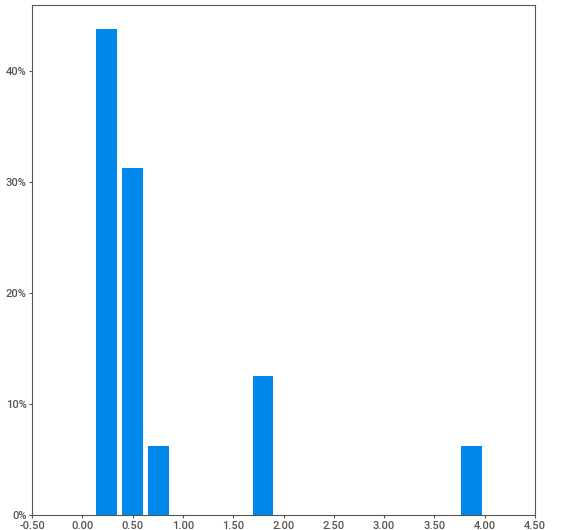
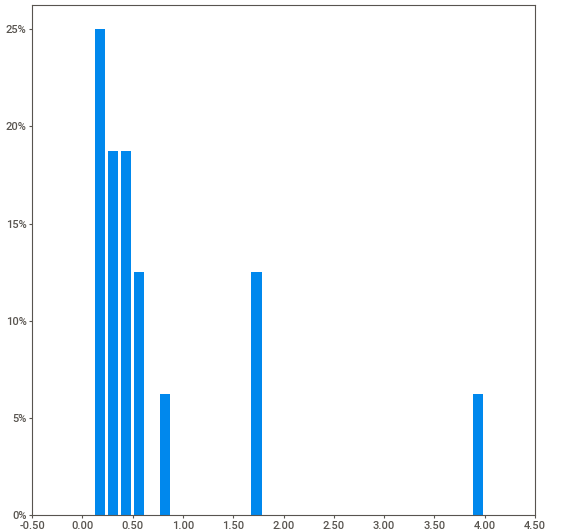
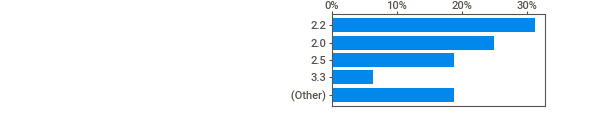
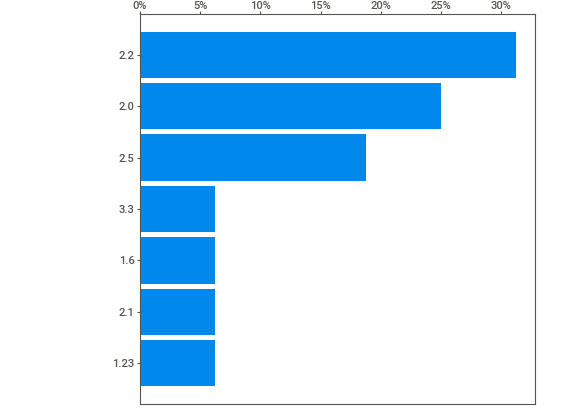
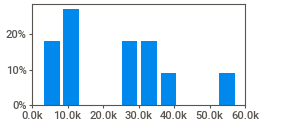
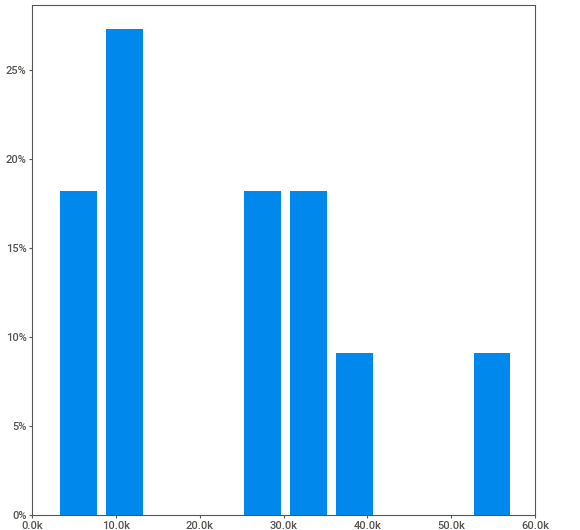
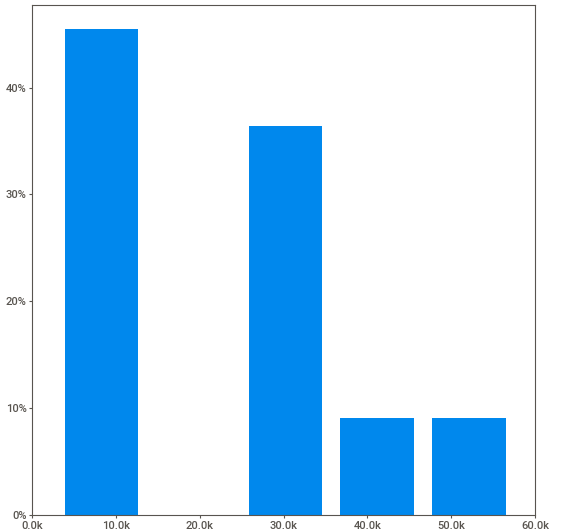
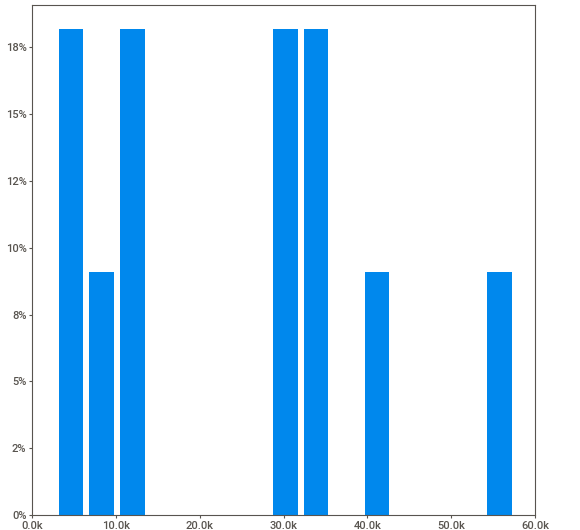
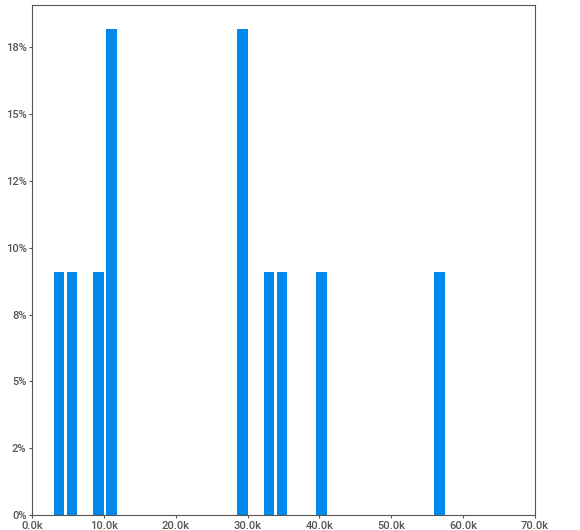
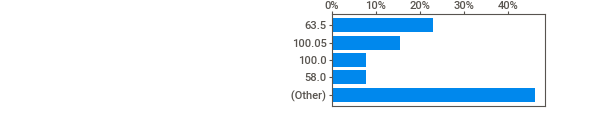
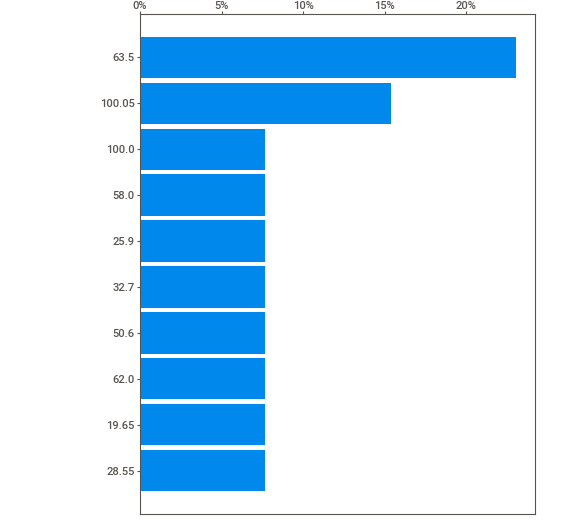
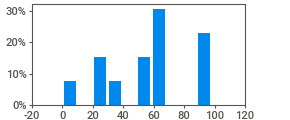
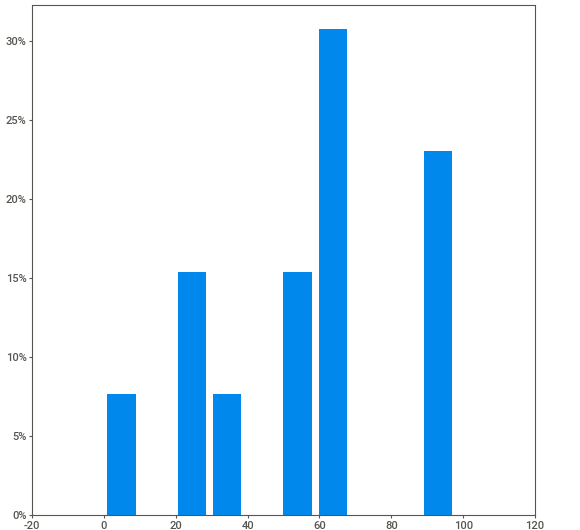
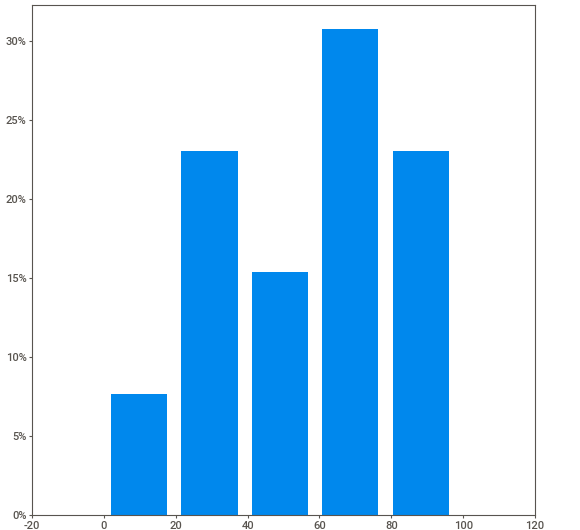
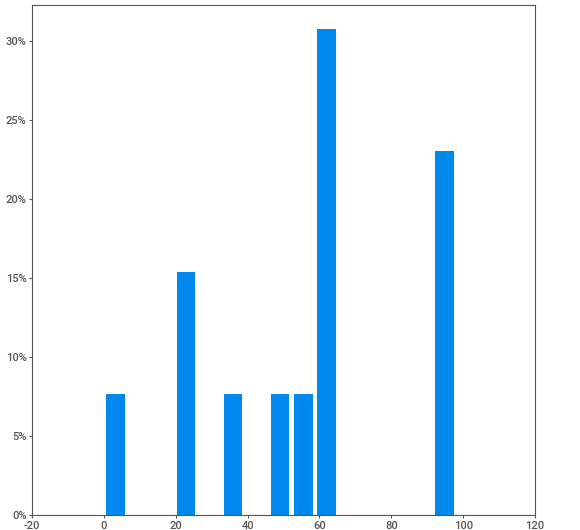
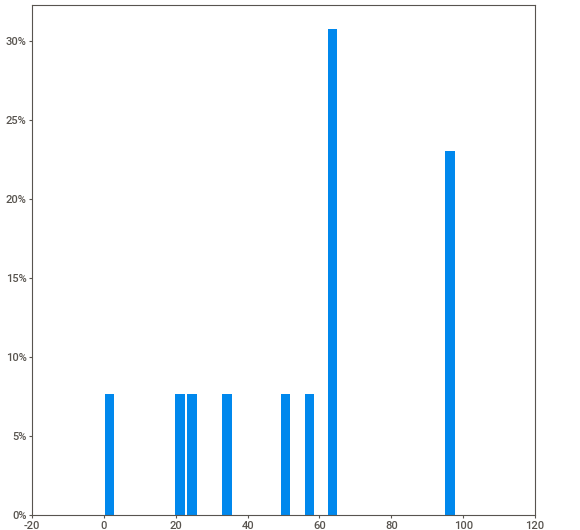
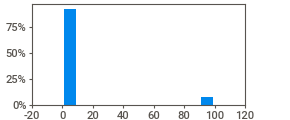
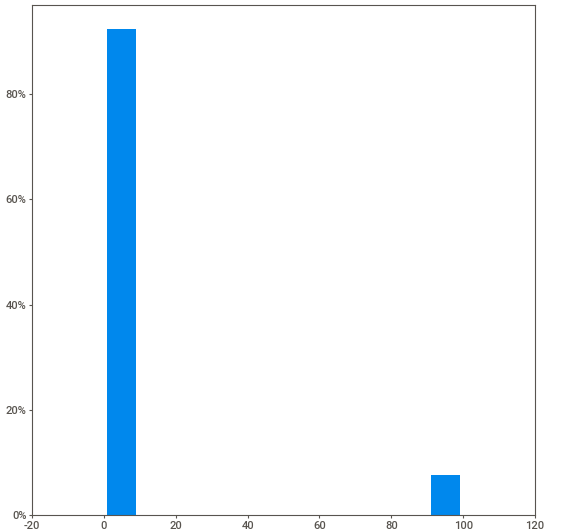
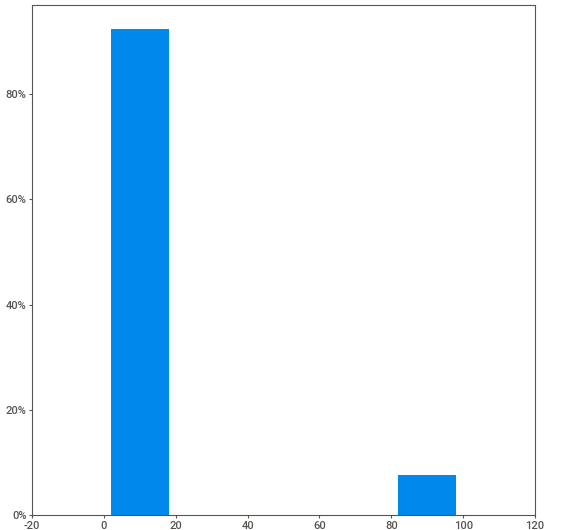
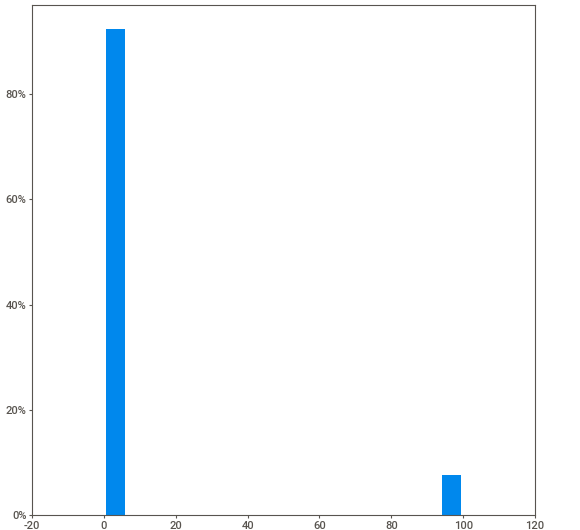
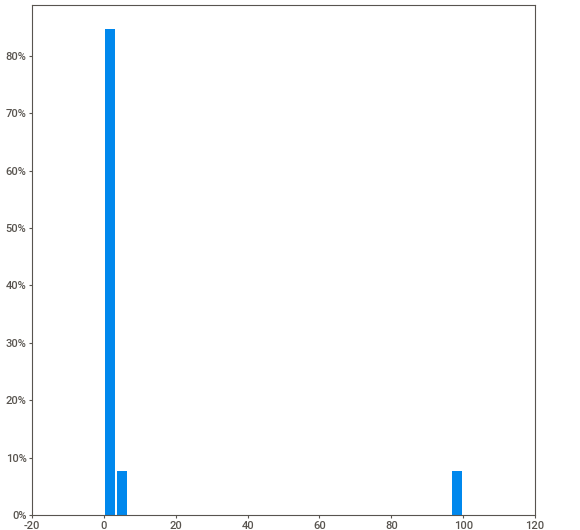
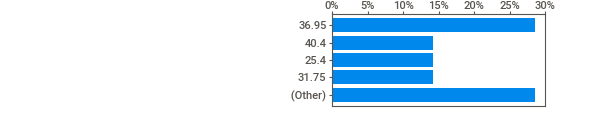
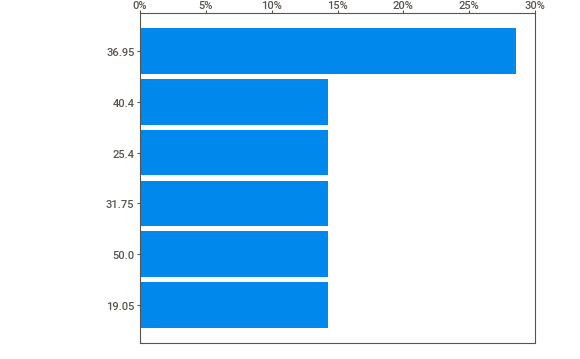
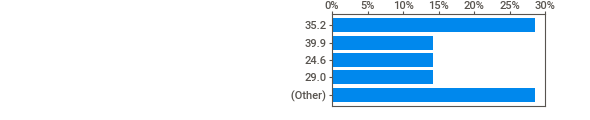
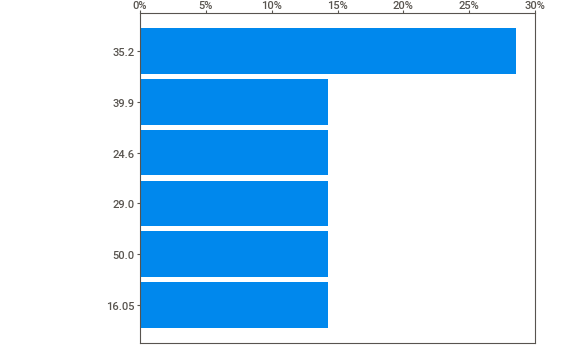
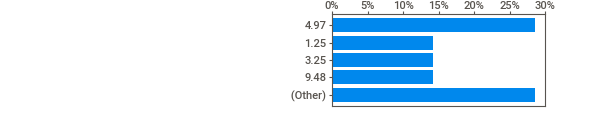
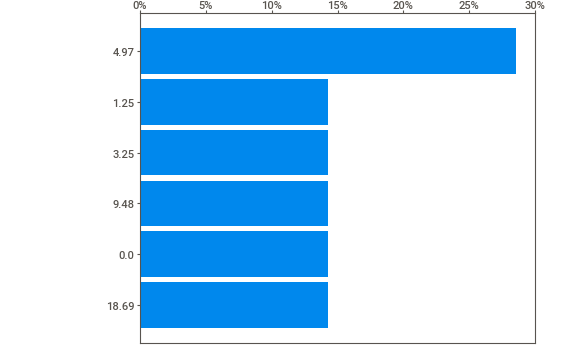
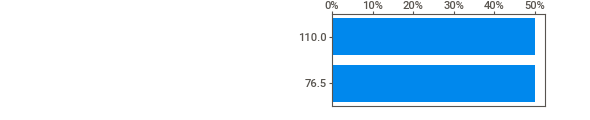
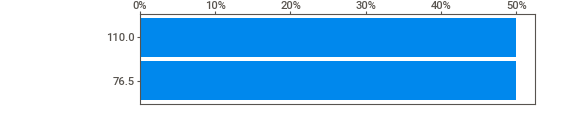
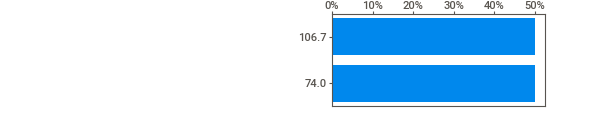
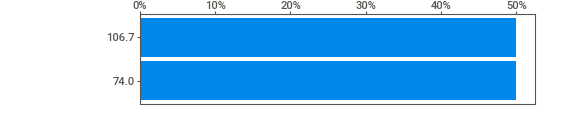
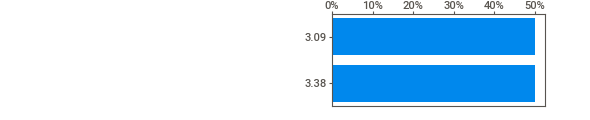
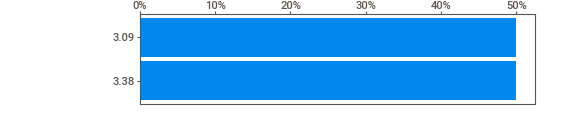
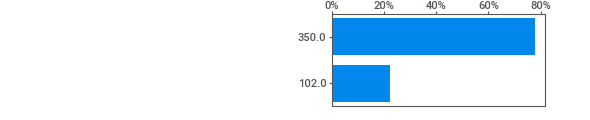
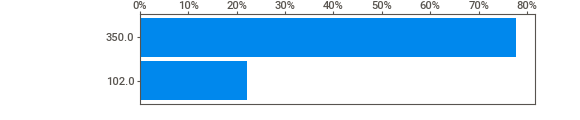
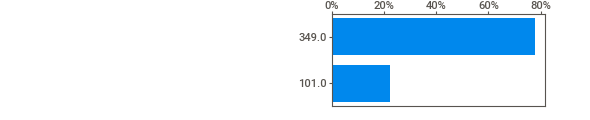
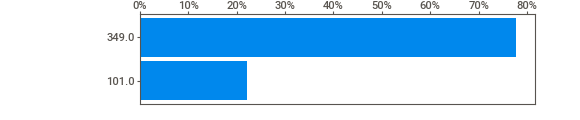
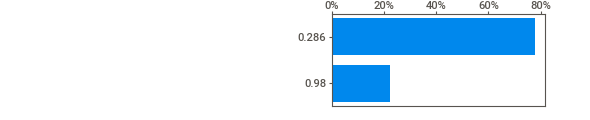
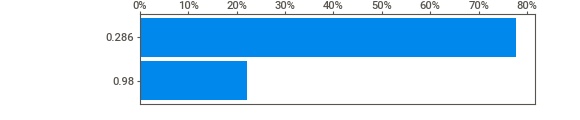
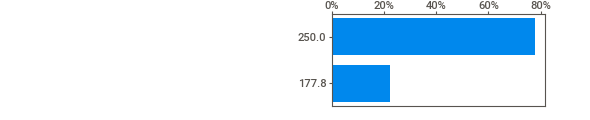
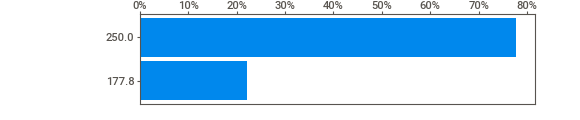
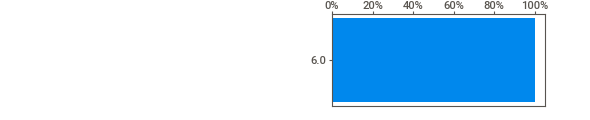
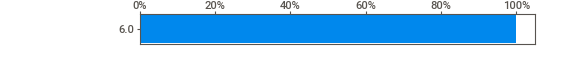
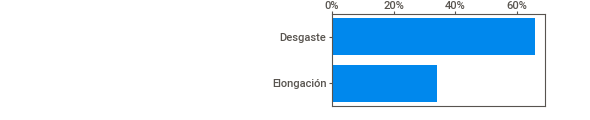
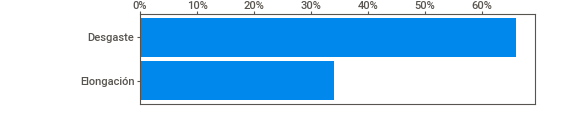
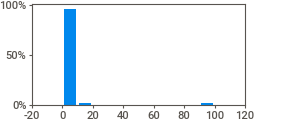
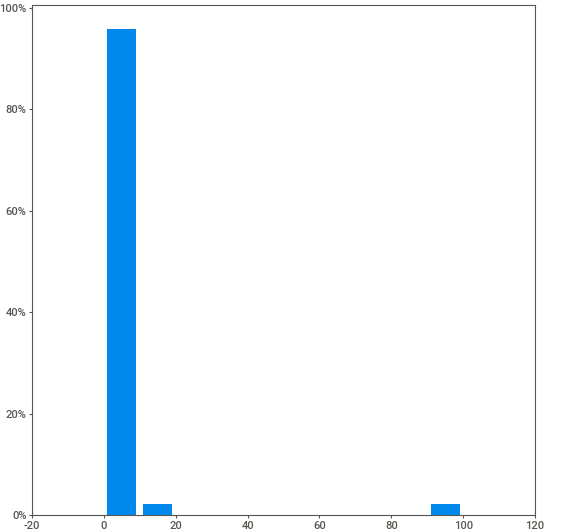
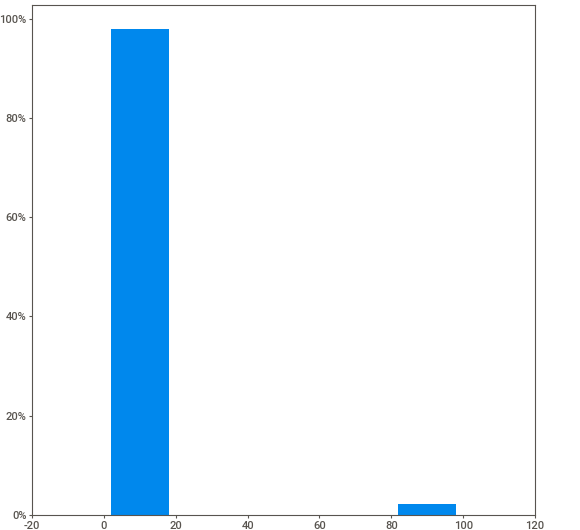
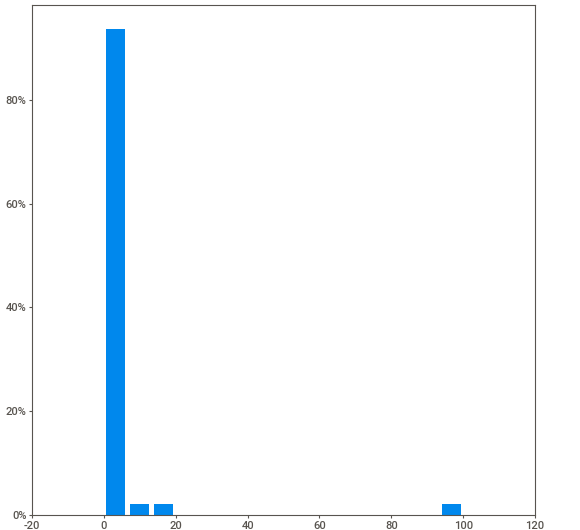
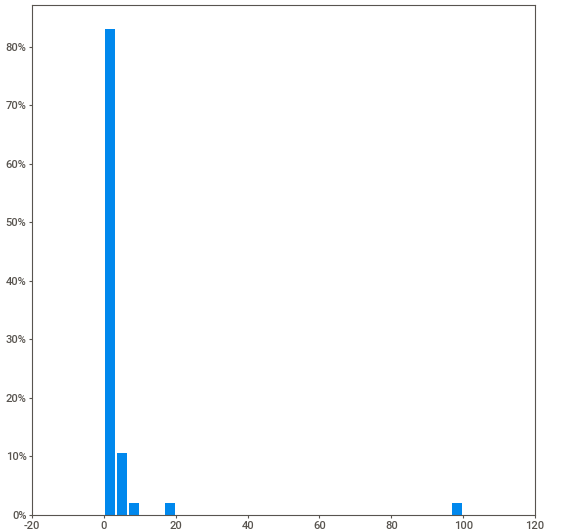
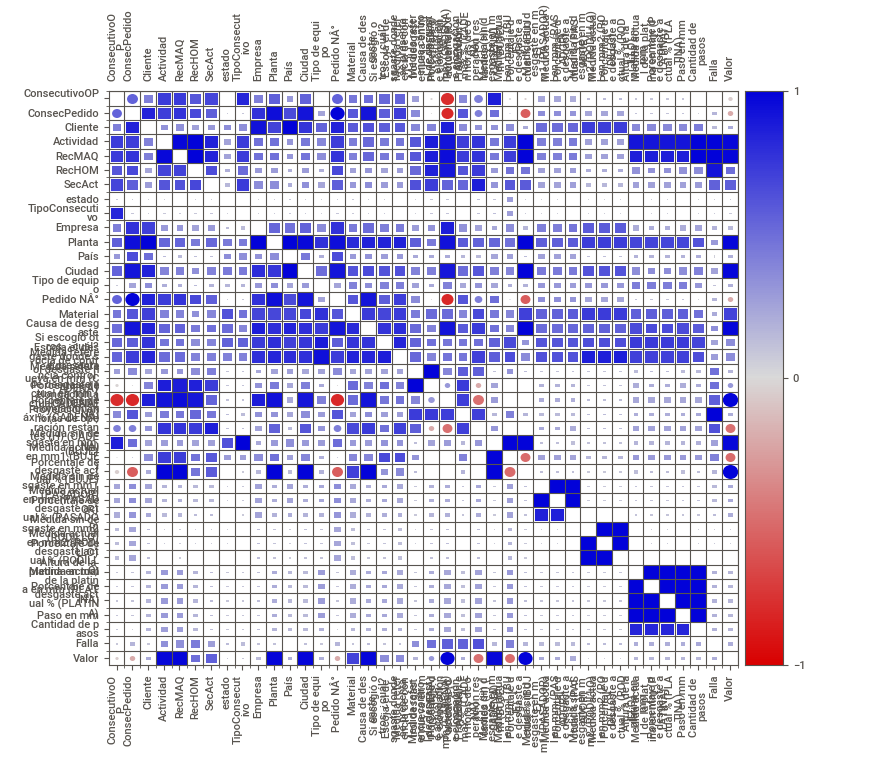
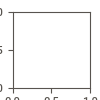

In [11]:
#Exploración rápida de las variables de bd_fallas
rgd = sv.analyze(BD_fallas)
rgd.show_notebook()

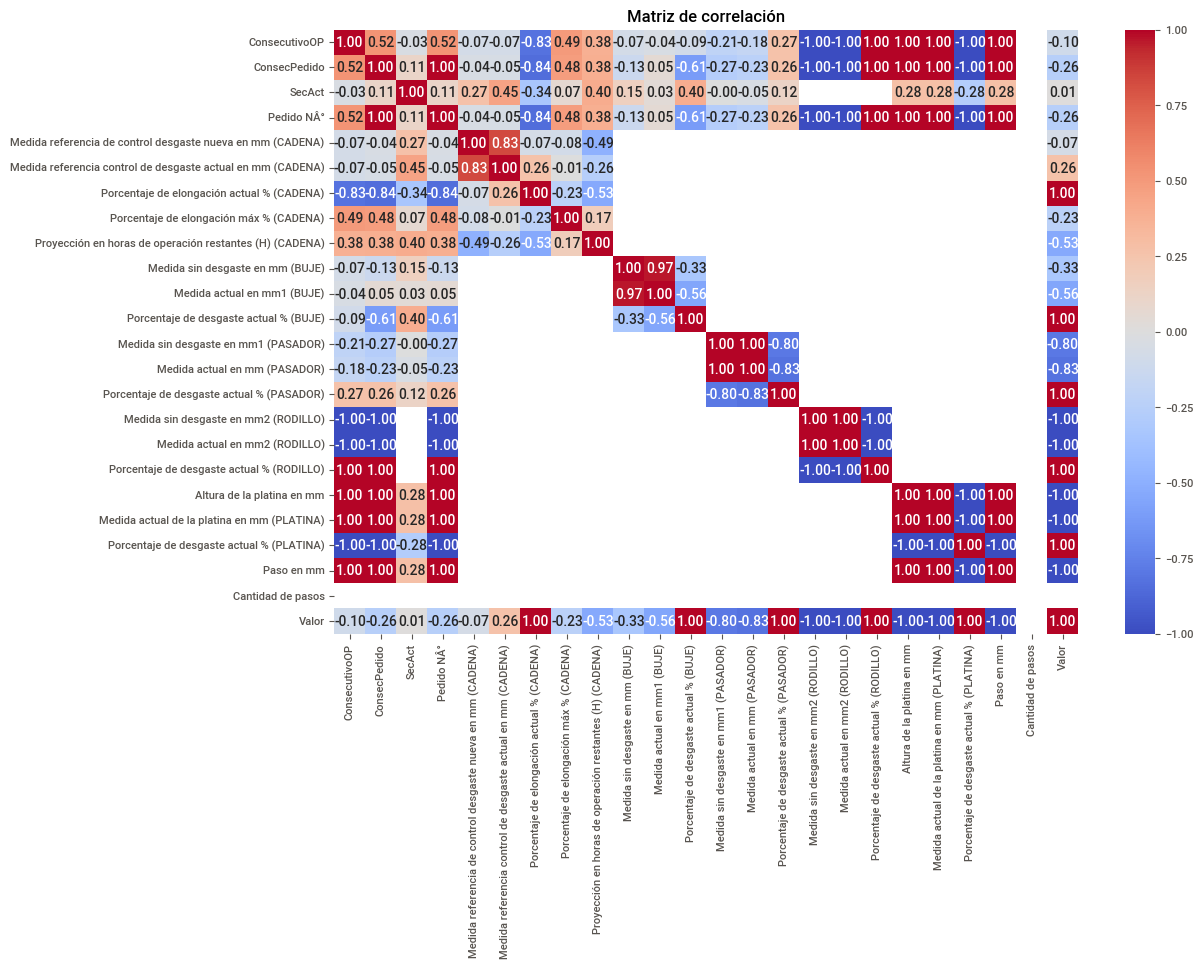

In [12]:
# Veamos un análisis de correlación #REVISAR
# variables numéricas
numericas = BD_fallas.select_dtypes(include=['int64','int32', 'float64'])

# Calcula la matriz de correlación
correlation_matrix = numericas.corr()

# Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

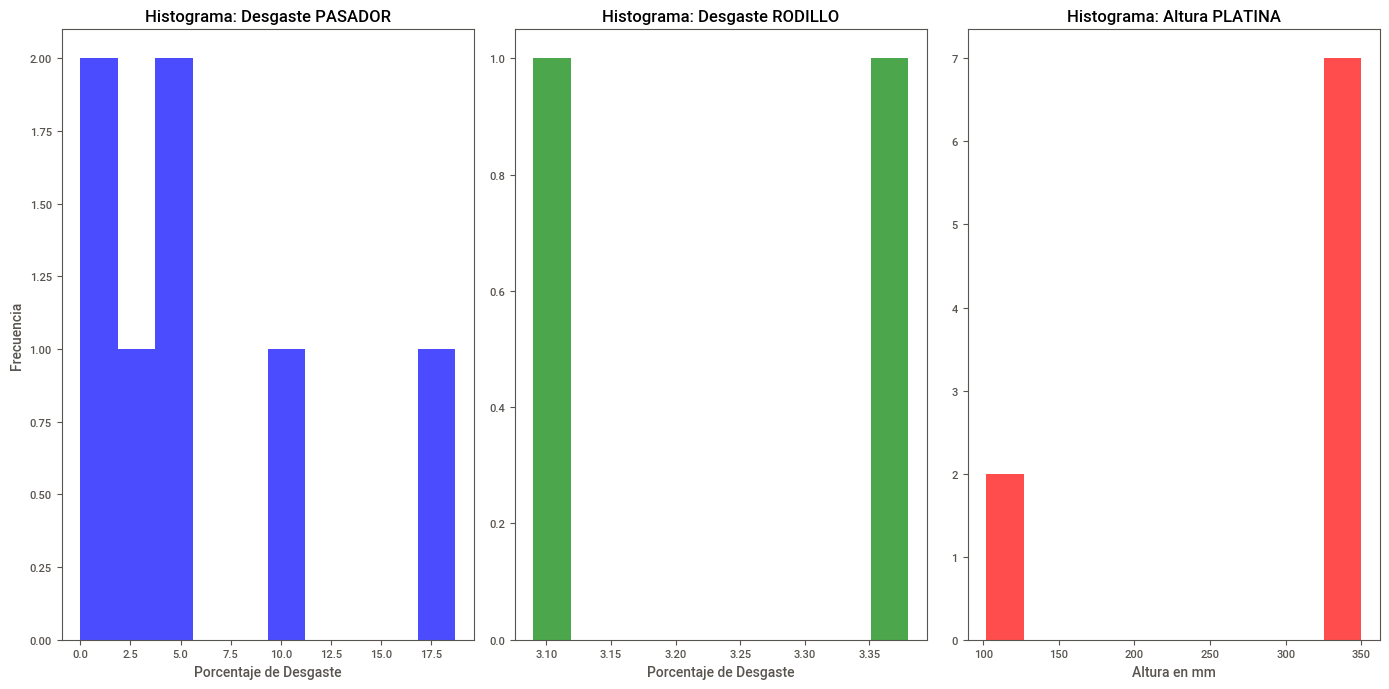

In [13]:
# Histograma para porcentaje de desgaste en piezas

# Cargar la base de datos
df = BD_fallas

# Seleccionar las columnas relacionadas con los porcentajes de desgaste
columns_desgaste = [
    'Porcentaje de desgaste actual % (PASADOR)', 
    'Porcentaje de desgaste actual % (RODILLO)', 
    'Altura de la platina en mm'  # Se usará como proxy de desgaste
]

# Crear un nuevo DataFrame con las columnas de interés
df_desgaste = df[columns_desgaste]

# Convertir las columnas a numérico (por si hay valores no válidos)
df_desgaste = df_desgaste.apply(pd.to_numeric, errors='coerce')

# Crear el histograma para cada columna
plt.figure(figsize=(14, 7))

# Histograma para PASADOR
plt.subplot(1, 3, 1)
plt.hist(df_desgaste['Porcentaje de desgaste actual % (PASADOR)'].dropna(), bins=10, color='b', alpha=0.7)
plt.title('Histograma: Desgaste PASADOR')
plt.xlabel('Porcentaje de Desgaste')
plt.ylabel('Frecuencia')

# Histograma para RODILLO
plt.subplot(1, 3, 2)
plt.hist(df_desgaste['Porcentaje de desgaste actual % (RODILLO)'].dropna(), bins=10, color='g', alpha=0.7)
plt.title('Histograma: Desgaste RODILLO')
plt.xlabel('Porcentaje de Desgaste')

# Histograma para PLATINA (proxy de desgaste)
plt.subplot(1, 3, 3)
plt.hist(df_desgaste['Altura de la platina en mm'].dropna(), bins=10, color='r', alpha=0.7)
plt.title('Histograma: Altura PLATINA')
plt.xlabel('Altura en mm')

plt.tight_layout()
plt.show()


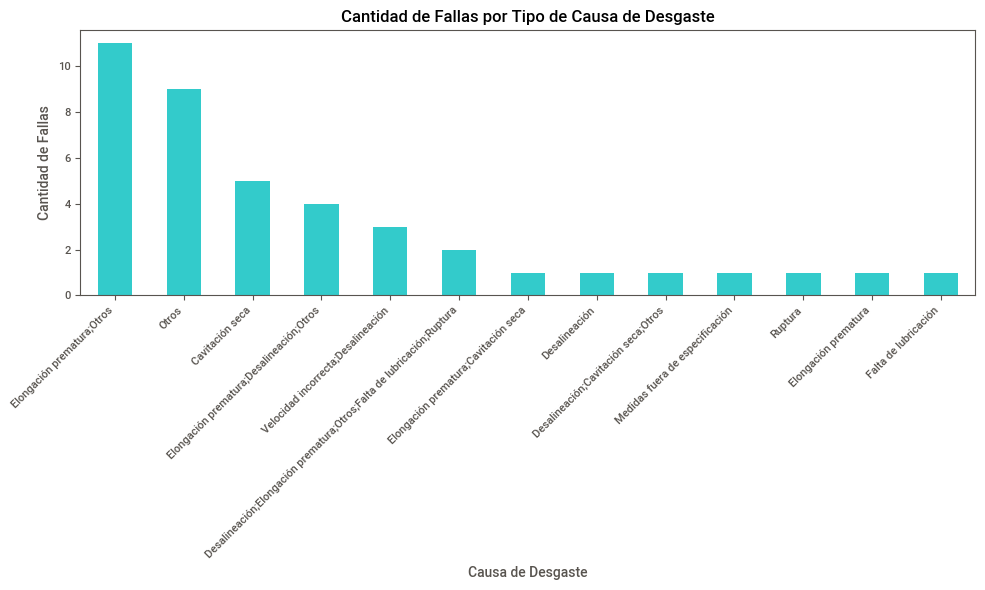

In [14]:
# Agrupar los datos por la columna "Causa de desgaste" y contar la frecuencia de cada tipo de falla
falla_counts = df['Causa de desgaste'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
falla_counts.plot(kind='bar', color='c', alpha=0.8)

# Personalización del gráfico
plt.title('Cantidad de Fallas por Tipo de Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Cantidad de Fallas')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


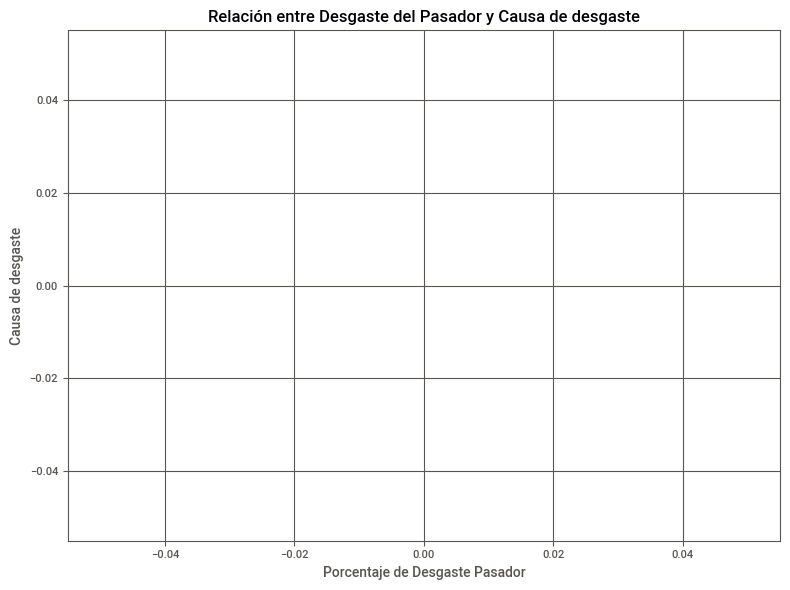

In [15]:
#Relación de degaste entre rodillo y pasador

# Seleccionar las columnas de interés (desgaste del pasador y rodillo)
df_desgaste = df[['Porcentaje de desgaste actual % (PASADOR)', 'Causa de desgaste']]

# Convertir las columnas a numérico (por si hay valores no válidos)
df_desgaste = df_desgaste.apply(pd.to_numeric, errors='coerce')

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_desgaste['Porcentaje de desgaste actual % (PASADOR)'], 
            df_desgaste['Causa de desgaste'], 
            color='b', alpha=0.7)

# Personalización del gráfico
plt.title('Relación entre Desgaste del Pasador y Causa de desgaste')
plt.xlabel('Porcentaje de Desgaste Pasador')
plt.ylabel('Causa de desgaste')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [17]:
# Verificar nombre de las columnas
print(df.columns)

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'País', 'Ciudad', 'Tipo de equipo', 'Pedido NÂ°', 'Material',
       'Causa de desgaste', 'Si escogió otros, ¿cuál?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongación actual % (CADENA)',
       'Porcentaje de elongación máx % (CADENA)',
       'Proyección en horas de operación restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de desgaste actua

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


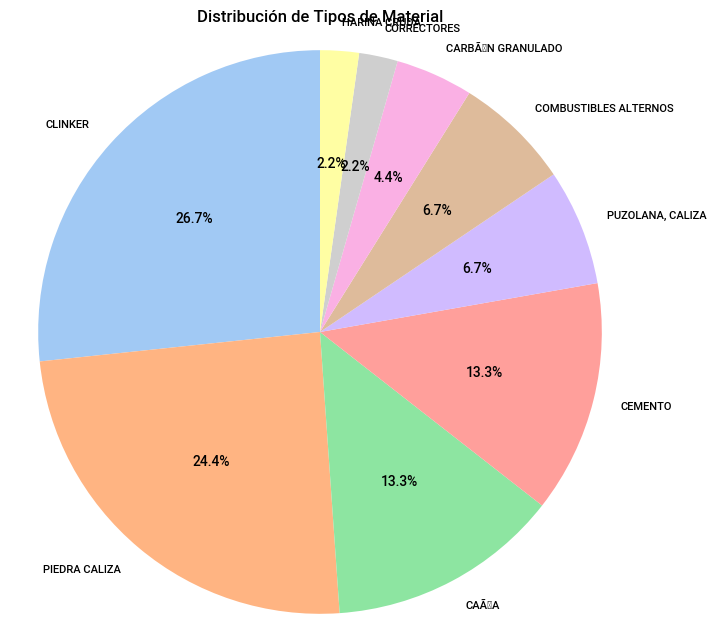

In [18]:

# Agrupar los datos por la columna "Material" y contar la frecuencia de cada tipo de material
material_counts = df['Material'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Personalización del gráfico
plt.title('Distribución de Tipos de Material')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo perfecto

# Mostrar el gráfico
plt.show()


C:\Users\cesar\AppData\Local\Temp\ipykernel_19996\110265561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jitter['Porcentaje de elongación actual % (CADENA)'] = pd.to_numeric(df_jitter['Porcentaje de elongación actual % (CADENA)'], errors='coerce')
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

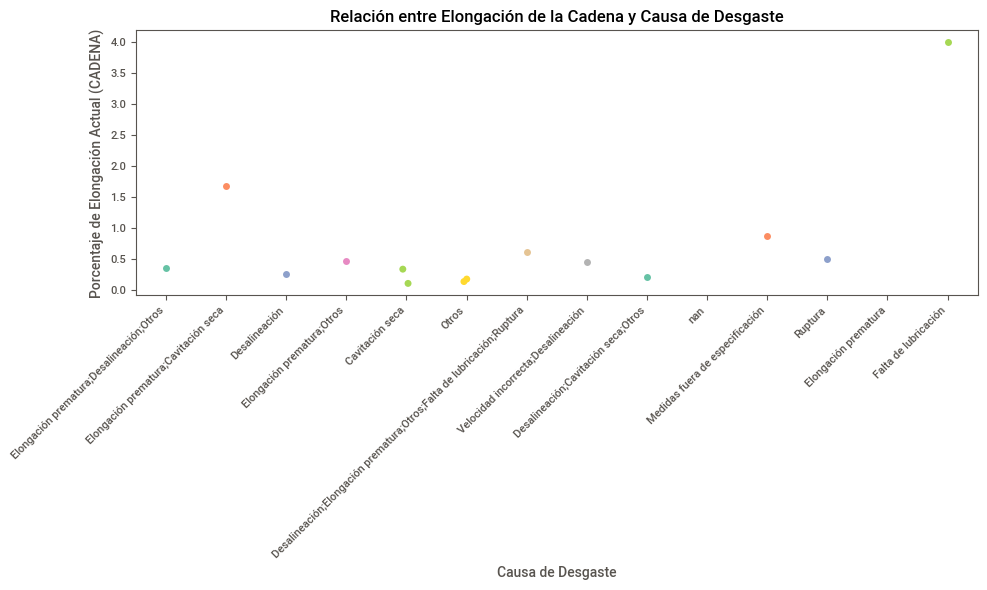

In [19]:

# Relación entre fallas y desgaste en cadena 

df_jitter = df[['Porcentaje de elongación actual % (CADENA)', 'Causa de desgaste']]

# Convertir la columna de porcentaje de elongación a numérico (por si hay valores no válidos)
df_jitter['Porcentaje de elongación actual % (CADENA)'] = pd.to_numeric(df_jitter['Porcentaje de elongación actual % (CADENA)'], errors='coerce')

# Crear el gráfico de dispersión con jitter para evitar solapamiento de puntos
plt.figure(figsize=(10, 6))
sns.stripplot(x='Causa de desgaste', y='Porcentaje de elongación actual % (CADENA)', data=df_jitter, jitter=True, palette="Set2")

# Personalización del gráfico
plt.title('Relación entre Elongación de la Cadena y Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Porcentaje de Elongación Actual (CADENA)')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


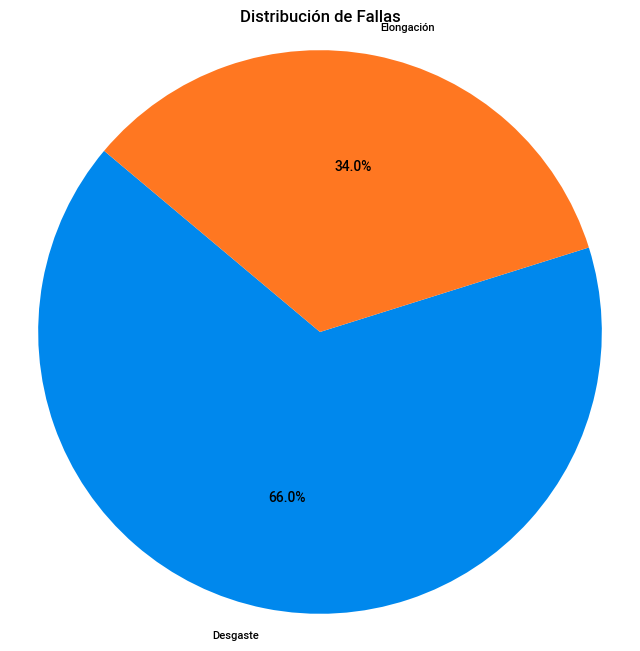

In [20]:
# Contar la frecuencia de cada categoría en la columna "Falla"
falla_counts = BD_fallas['Falla'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(falla_counts, labels=falla_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Fallas')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


In [28]:
# Crear un nuevo dataframe con las columnas seleccionadas
columnas_seleccionadas = ["NombProducto", "País", "Tipo de equipo", "Material", "Causa de desgaste", "Falla", "Valor"]
df_opt = BD_fallas[columnas_seleccionadas]

# Mostrar el nuevo dataframe
print(df_opt)

                       NombProducto      País            Tipo de equipo  \
0               PTNA INT 16X103X301  COLOMBIA       Elevador cangilones   
1           CDNA FB 864-K443-C2-P7"  COLOMBIA       Elevador cangilones   
2          CDNA FB-6830-K2-C2 P 6"   COLOMBIA       Elevador cangilones   
3         PTNA INT ADIT 9.5X152X349  COLOMBIA     Reclamador y apilador   
4               PTNA CAB 9.5X78X349  COLOMBIA     Reclamador y apilador   
5    BUJE ÃE63.5XÃI40.75X140.5 EC    MEXICO       Elevador cangilones   
6               PTNA PIN 9.5X78X349  COLOMBIA     Reclamador y apilador   
7         RODILLO ÃE110XÃI42.7X51  COLOMBIA     Reclamador y apilador   
8      BUJE ÃE50XÃI32.55X74.05 EC  COLOMBIA     Reclamador y apilador   
9     CDNA ELEVADOR FB AU06.3 C2 P7    MEXICO       Elevador cangilones   
10   PASADOR 44.45X41.15X198.7 PERF    MEXICO       Elevador cangilones   
11          CDNA FB 311-TK1-C2-P250  COLOMBIA     Reclamador y apilador   
12     CDNA FB TRANS AU80

In [29]:
# Filtrar las filas que contienen la palabra 'BUJE' en la columna 'NombProducto'
df_opt_BUJE = df_opt[df_opt['NombProducto'].str.contains('BUJE', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
print(df_opt_BUJE)

                       NombProducto      País            Tipo de equipo  \
5    BUJE ÃE63.5XÃI40.75X140.5 EC    MEXICO       Elevador cangilones   
8      BUJE ÃE50XÃI32.55X74.05 EC  COLOMBIA     Reclamador y apilador   
14     BUJE ÃE50XÃI32.55X74.05 EC  COLOMBIA     Reclamador y apilador   
17        BUJE ÃE58.05XÃI37.0X112    MEXICO       Elevador cangilones   
19    BUJE ÃE63.5XÃI35.6X140.5 EC    MEXICO       Elevador cangilones   
21      BUJE ÃE63.5XÃI35.55X127.8  COLOMBIA       Elevador cangilones   
23       BUJE ÃE44.45X26.05X101.6   COLOMBIA       Elevador cangilones   
27              BUJE ÃE35XÃI21X41  COLOMBIA     Reclamador y apilador   
28      BUJE ÃE60.5XÃI32.3X127.25  COLOMBIA       Elevador cangilones   
29       BUJE ÃE76.05XÃI50.75X128    MEXICO  Tansportador de tablilla   
31   BUJE ÃE63.5XÃI40.75X140.5 EC    MEXICO       Elevador cangilones   
33       BUJE ÃE36.6ÃI19.65X85 EC    PANAMÁ       Elevador cangilones   
45  BUJE ÃE28.55XÃI19.4

In [30]:
# Filtrar las filas que contienen la palabra 'CADENA' en la columna 'NombProducto'
df_opt_CDNA = df_opt[df_opt['NombProducto'].str.contains('CDNA', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
print(df_opt_CDNA)

                      NombProducto      País            Tipo de equipo  \
1          CDNA FB 864-K443-C2-P7"  COLOMBIA       Elevador cangilones   
2         CDNA FB-6830-K2-C2 P 6"   COLOMBIA       Elevador cangilones   
9    CDNA ELEVADOR FB AU06.3 C2 P7    MEXICO       Elevador cangilones   
11         CDNA FB 311-TK1-C2-P250  COLOMBIA     Reclamador y apilador   
12    CDNA FB TRANS AU8076-C5-P250    MEXICO  Tansportador de tablilla   
15            CDNA FB 833-K2-C3-P6    PANAMÁ       Elevador cangilones   
18             CDNA FB 2198 C6 P6"  COLOMBIA     Reclamador y apilador   
24  CDNA ELEV ER857 ADIT K44 C2 P6  COLOMBIA       Elevador cangilones   
32    CDNA ELEV FB 984-K443-C2-P7"    MEXICO       Elevador cangilones   
34            CDNA FB 2648-P12"-T0  COLOMBIA  Tansportador de tablilla   
35    CDNA ELEV FB 994-K443-C2-P7"    MEXICO       Elevador cangilones   
37    CDNA FB-984 ADIT K443-C2-P7"  COLOMBIA       Elevador cangilones   
38    CDNA FB-984 ADIT K443-C2-P7"  CO

In [31]:
# Filtrar las filas que contienen la palabra 'PASADOR' en la columna 'NombProducto'
df_opt_PASADOR = df_opt[df_opt['NombProducto'].str.contains('PASADOR', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
print(df_opt_PASADOR)

                      NombProducto      País            Tipo de equipo  \
10  PASADOR 44.45X41.15X198.7 PERF    MEXICO       Elevador cangilones   
22        PASADOR 28X26X149.8 PERF  COLOMBIA       Elevador cangilones   
25      PASADOR 38.1X32.8X186 PERF  COLOMBIA       Elevador cangilones   
26         PASADOR 50.05X203.2 RAN    MEXICO  Tansportador de tablilla   
36     PASADOR 44.4X42X201 CP/PERF  COLOMBIA  Tansportador de tablilla   
41    PASADOR 44.4X41X296.9 CP/RAN  COLOMBIA  Tansportador de tablilla   
43      PASADOR 22.2X19.70X127 PER    PANAMÁ       Elevador cangilones   

                 Material                   Causa de desgaste     Falla  Valor  
10       PUZOLANA, CALIZA                     Cavitación seca  Desgaste   1.25  
22       CARBÓN GRANULADO                               Otros  Desgaste   3.25  
25                CEMENTO                                 NaN  Desgaste   9.48  
26                CLINKER                               Otros  Desgaste   0.00  
36

In [32]:
# Filtrar las filas que contienen la palabra 'PLATINA' en la columna 'NombProducto'
df_opt_PTNA = df_opt[df_opt['NombProducto'].str.contains('PTNA', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
print(df_opt_PTNA)

                       NombProducto      País         Tipo de equipo  \
0               PTNA INT 16X103X301  COLOMBIA    Elevador cangilones   
3         PTNA INT ADIT 9.5X152X349  COLOMBIA  Reclamador y apilador   
4               PTNA CAB 9.5X78X349  COLOMBIA  Reclamador y apilador   
6               PTNA PIN 9.5X78X349  COLOMBIA  Reclamador y apilador   
16              PTNA INT 9.5X78X349  COLOMBIA  Reclamador y apilador   
20         PTNA SUFRIDERA 15X40X60   COLOMBIA  Reclamador y apilador   
30     PTNA CAB SUF 9.5X78X349-SOLD  COLOMBIA  Reclamador y apilador   
39   PTNA INT ADIT 9.5X152X349-SOLD  COLOMBIA  Reclamador y apilador   
40  PTNA EXT ADIT16X122.2X271 -90Â°  COLOMBIA    Elevador cangilones   

         Material                         Causa de desgaste     Falla  Valor  
0         CLINKER  Elongación prematura;Desalineación;Otros  Desgaste  0.980  
3   PIEDRA CALIZA                Elongación prematura;Otros  Desgaste  0.286  
4   PIEDRA CALIZA                Elongació

In [33]:
# Filtrar las filas que contienen la palabra 'RODILLO' en la columna 'NombProducto'
df_opt_RODILLO = df_opt[df_opt['NombProducto'].str.contains('RODILLO', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
print(df_opt_RODILLO)

                       NombProducto      País         Tipo de equipo  \
7         RODILLO ÃE110XÃI42.7X51  COLOMBIA  Reclamador y apilador   
13  RODILLO ÃE76.2XÃI32.35X37.7    COLOMBIA  Reclamador y apilador   

       Material                                  Causa de desgaste     Falla  \
7   CORRECTORES                                              Otros  Desgaste   
13         CAÑA  Desalineación;Elongación prematura;Otros;Falta...  Desgaste   

    Valor  
7    3.09  
13   3.38  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


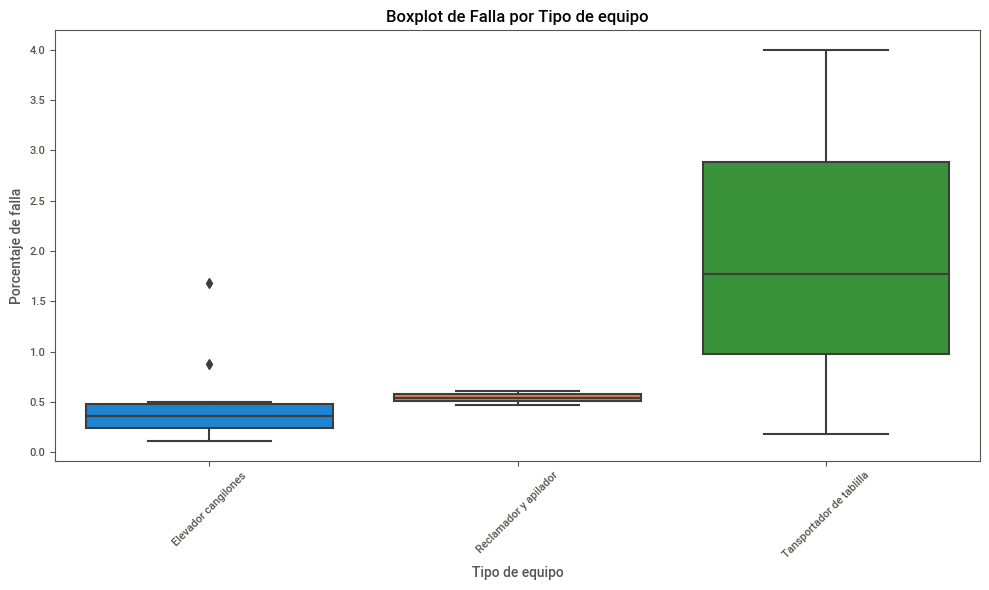

In [36]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de equipo', y='Valor', data=df_opt_CDNA)

# Mejorar la visualización del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
plt.title('Boxplot de Falla por Tipo de equipo')
plt.xlabel('Tipo de equipo')
plt.ylabel('Porcentaje de falla')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


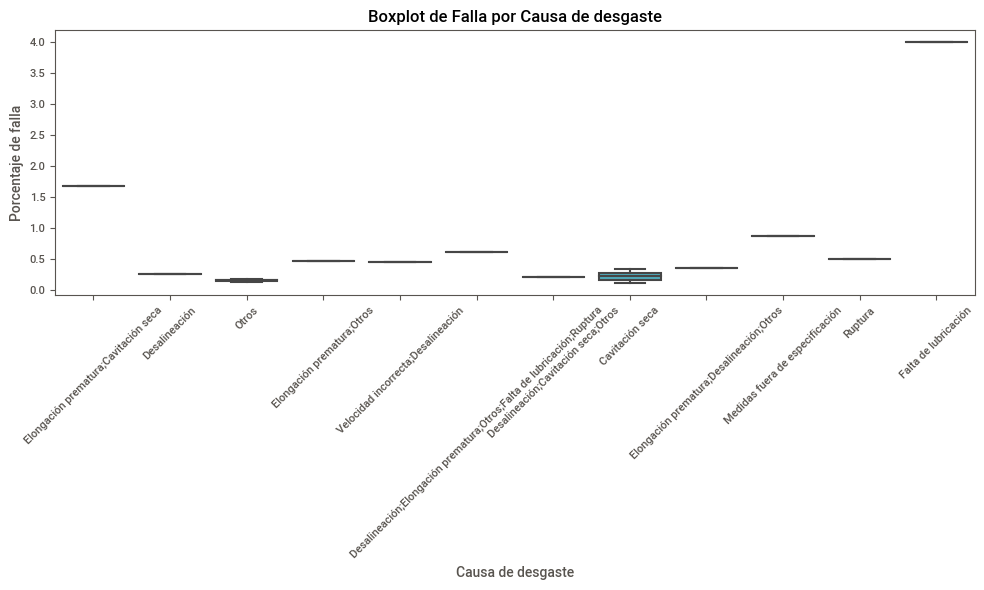

In [37]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Causa de desgaste', y='Valor', data=df_opt_CDNA)

# Mejorar la visualización del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
plt.title('Boxplot de Falla por Causa de desgaste')
plt.xlabel('Causa de desgaste')
plt.ylabel('Porcentaje de falla')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\cesar\AppData\Local\Temp\ipykernel_19996\3871898879.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tipo de equipo', y='Valor', data=df_opt_CDNA, estimator='mean', ci=None)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

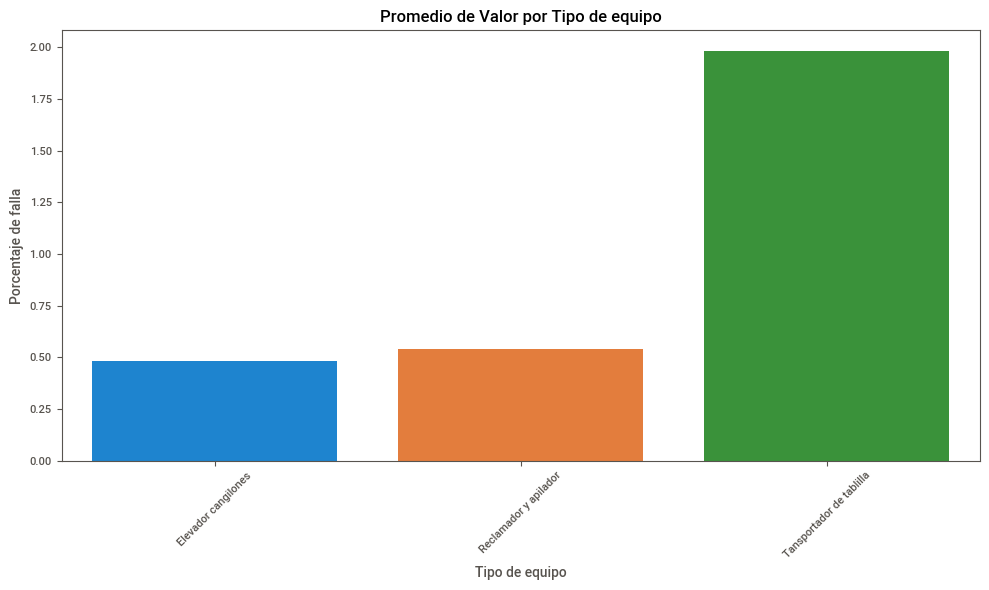

In [41]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de equipo', y='Valor', data=df_opt_CDNA, estimator='mean', ci=None)

# Mejorar la visualización del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
plt.title('Promedio de Valor por Tipo de equipo')
plt.xlabel('Tipo de equipo')
plt.ylabel('Porcentaje de falla')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\cesar\AppData\Local\Temp\ipykernel_19996\1986641133.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Causa de desgaste', y='Valor', data=df_opt_CDNA, estimator='mean', ci=None)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

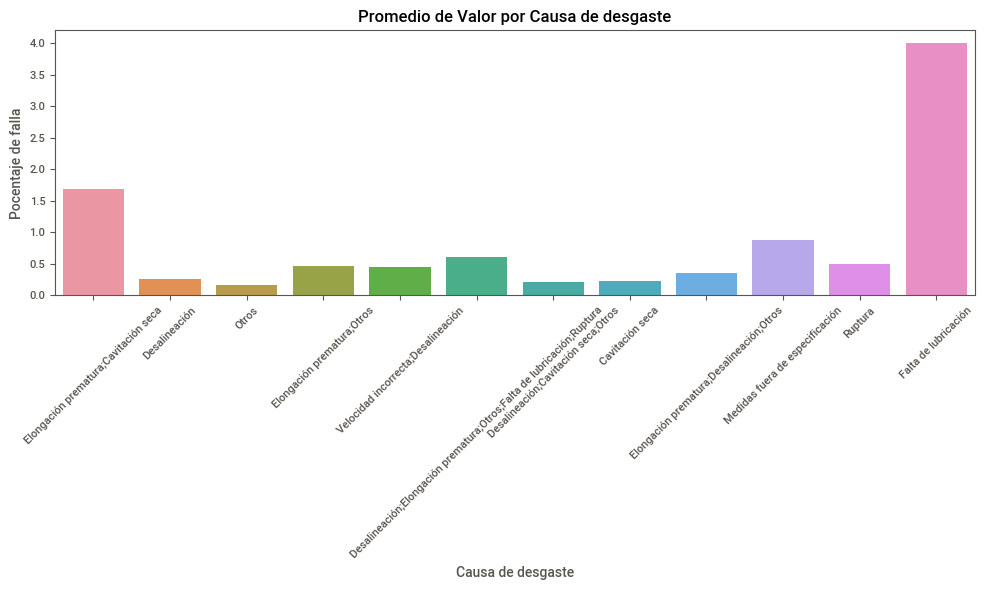

In [40]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Causa de desgaste', y='Valor', data=df_opt_CDNA, estimator='mean', ci=None)

# Mejorar la visualización del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
plt.title('Promedio de Valor por Causa de desgaste')
plt.xlabel('Causa de desgaste')
plt.ylabel('Pocentaje de falla')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

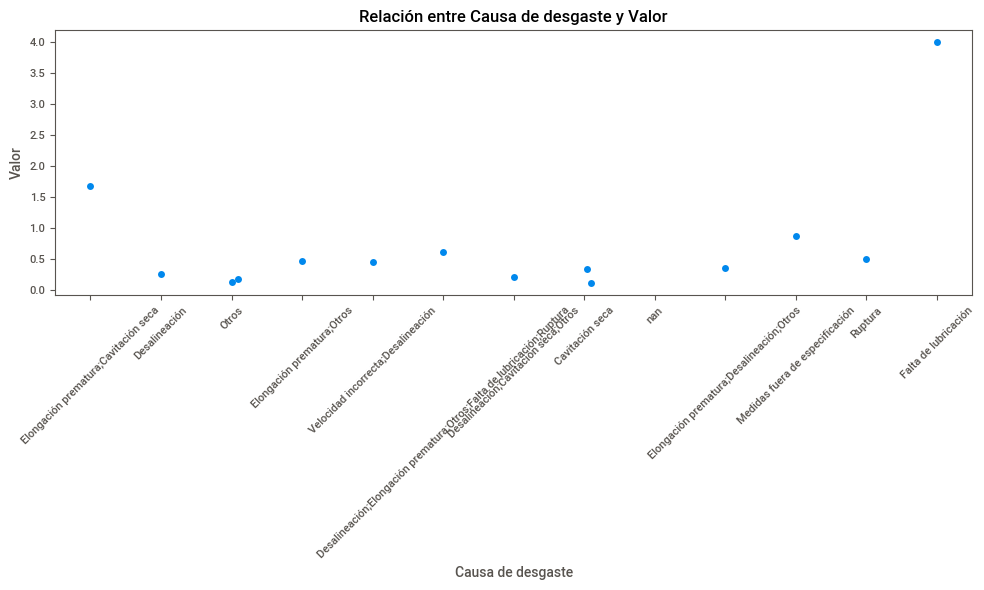

In [43]:
# Crear el gráfico de dispersión (stripplot)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Causa de desgaste', y='Valor', data=df_opt_CDNA, jitter=True)

# Mejorar la visualización
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
plt.title('Relación entre Causa de desgaste y Valor')
plt.xlabel('Causa de desgaste')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
